## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import dataset

In [2]:
train_df=pd.read_csv('data/train.csv')

### lets explore our dataset

In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### list of columns

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### get ride of categorical variables

In [5]:
cols=train_df.applymap(np.isreal).all()
categoricals=cols.index[~cols].tolist()
numericals=cols.index[cols].tolist()

In [6]:
numericals=pd.DataFrame(numericals)

In [7]:
numericals

,0
0,Id
1,MSSubClass
2,LotFrontage
3,LotArea
4,OverallQual
5,OverallCond
6,YearBuilt
7,YearRemodAdd
8,MasVnrArea
9,BsmtFinSF1


 We have 80 columns in our dataset. To be efficient, we have to find corellations between variables and salesprice efficiently. so, we will use a heat map to see which wariable is involved in salesprice variation the easyest ant quicly way.

Now we get to the heat map

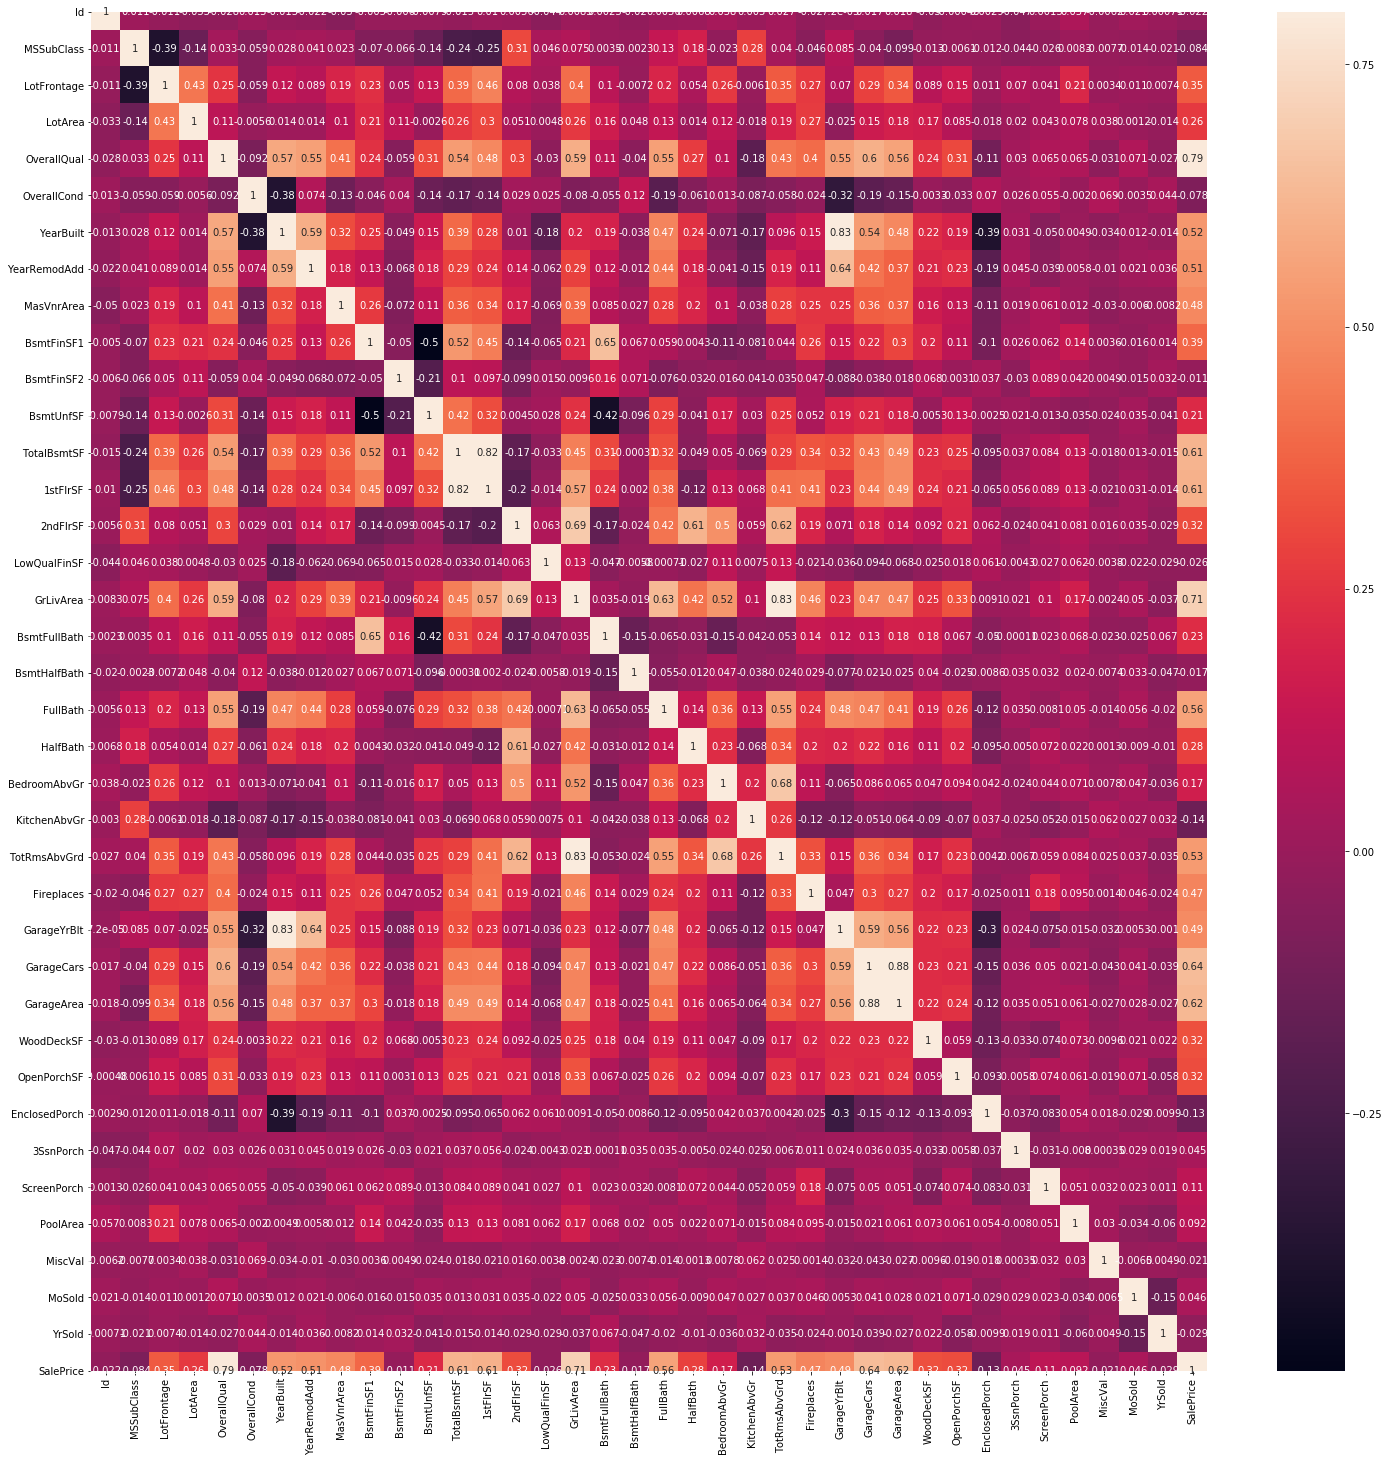

In [8]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=.8,annot=True);

We will take all variables having corellation score with SalePrice above 0.30 or under -0.30

In [9]:
sp_vals=corrmat['SalePrice']
above_25=sp_vals[sp_vals>0.30]
under_25_neg=sp_vals[sp_vals<-0.30]
selected=pd.concat([above_25,under_25_neg])

In [10]:
selected

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64

So we will keep
==============
    ** LotFrontage
    ** LotArea
    ** OverallQual
    ** YearBuilt
    ** YearRemodAdd
    ** MasVnrArea
    ** BsmtFinSF1
    ** TotalBsmtSF
    ** 1stFlrSF
    ** 2ndFlrSF
    ** GrLivArea
    ** FullBath
    ** TotRmsAbvGrd
    ** Fireplaces
    ** GarageYrBlt
    ** GarageCars
    ** GarageArea
    ** WoodDeckSF
    ** OpenPorchSF

We will now find if there is verry strong colinearity between some of our variables so we keep the one with the stongest colinearity with saleprice and let the other(s) down

In [11]:
num_df=train_df[selected.index]
num_df

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,0,953,953,694,1647,2,7,1,1999.0,2,460,0,40,175000
1456,85.0,6,1978,1988,119.0,790,1542,2073,0,2073,2,7,2,1978.0,2,500,349,0,210000
1457,66.0,7,1941,2006,0.0,275,1152,1188,1152,2340,2,9,2,1941.0,1,252,0,60,266500
1458,68.0,5,1950,1996,0.0,49,1078,1078,0,1078,1,5,0,1950.0,1,240,366,0,142125


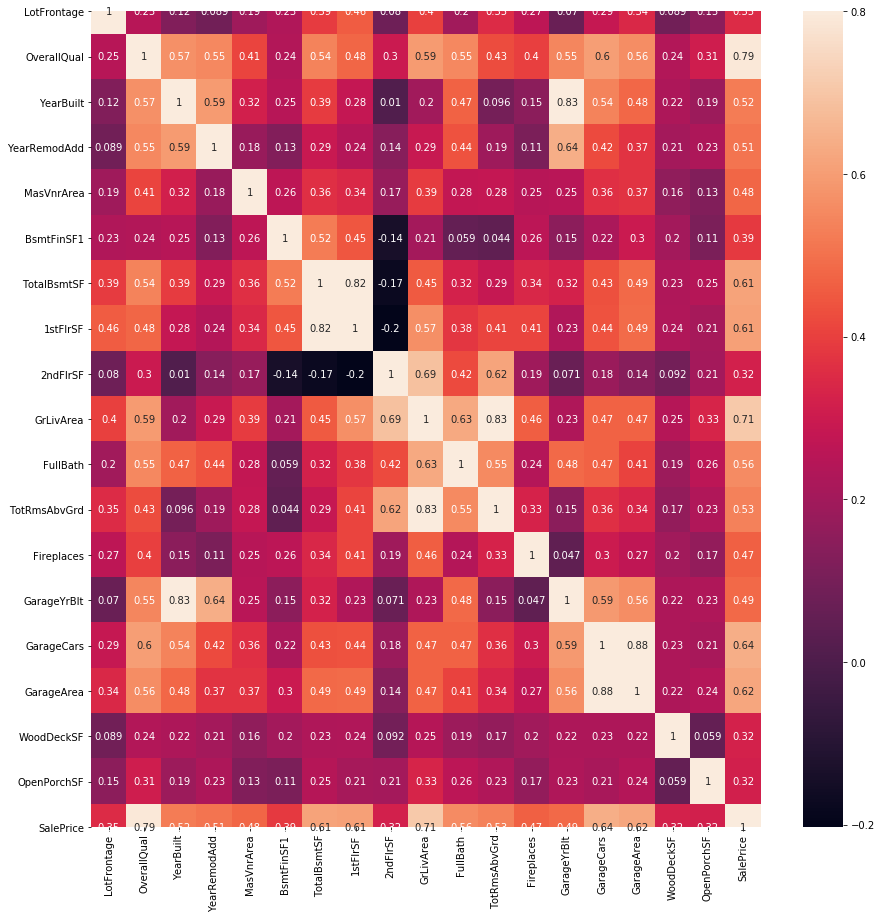

In [12]:
hcorrmat = num_df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(hcorrmat, vmax=.8,annot=True);

We can see strong corellations between:

    YearBuilt & GarageYrBlt
    YearBuilt & OverallQual
    OverallQual & YearRemodAdd
    TotalBasmtSF & 1stFlrSF
    GrLivArea & TotRmsAbvGrd
    GarageCars & GarageArea
    2ndFlrSF & GrLivArea
    BsmtFinSF1 & TotalBsmtSF
    FullBath & GrLivArea
We will remove features having low correlation with SalePrice and we will keep some based on our knowlage of the domain.

We will remove:
    
    GarageYrBlt
    YearRemodAdd
    1stFlrSF
    2ndFlrSF
    GarageArea
    BsmtFinSF1
    FullBath
    TotRmsAbvGrd

In [13]:
num_df=num_df.drop(['GarageYrBlt', '1stFlrSF', '2ndFlrSF',\
                     'TotRmsAbvGrd', 'YearRemodAdd', 'GarageArea', 'BsmtFinSF1', 'FullBath'],axis=1)
num_df

,LotFrontage,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,196.0,856,1710,0,2,0,61,208500
1,80.0,6,1976,0.0,1262,1262,1,2,298,0,181500
2,68.0,7,2001,162.0,920,1786,1,2,0,42,223500
3,60.0,7,1915,0.0,756,1717,1,3,0,35,140000
4,84.0,8,2000,350.0,1145,2198,1,3,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,0.0,953,1647,1,2,0,40,175000
1456,85.0,6,1978,119.0,1542,2073,2,2,349,0,210000
1457,66.0,7,1941,0.0,1152,2340,2,1,0,60,266500
1458,68.0,5,1950,0.0,1078,1078,0,1,366,0,142125


Let's look at witch categorical variables will be usefull to our regretion

We will do so by using a function that is similar to the one we used to create correlation coefficients for 
numerical datas but witch is adapted to categorical datas. 

In [14]:
from dython.nominal import associations

In [15]:
sale_price=train_df['SalePrice']
cat_df=train_df[categoricals]
cat_df["SalePrice"]=sale_price

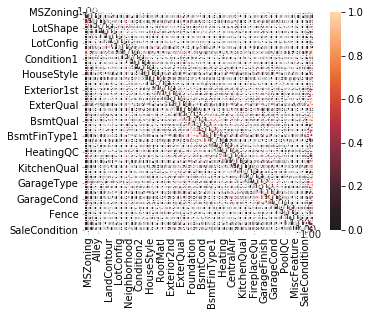

In [16]:
assoc=associations(cat_df,nominal_columns=categoricals)

In [17]:
sp_cat_val=assoc['corr']['SalePrice']
cat_selected=sp_cat_val[sp_cat_val>0.30]
cat_selected

MSZoning         0.327963
Neighborhood     0.738630
Exterior1st      0.390862
Exterior2nd      0.392211
MasVnrType       0.434537
ExterQual        0.690933
Foundation       0.506328
BsmtQual         0.681905
BsmtExposure     0.386653
BsmtFinType1     0.459141
HeatingQC        0.442154
KitchenQual      0.675721
FireplaceQu      0.542181
GarageType       0.499204
GarageFinish     0.553059
SaleType         0.370523
SaleCondition    0.368100
SalePrice        1.000000
Name: SalePrice, dtype: float64

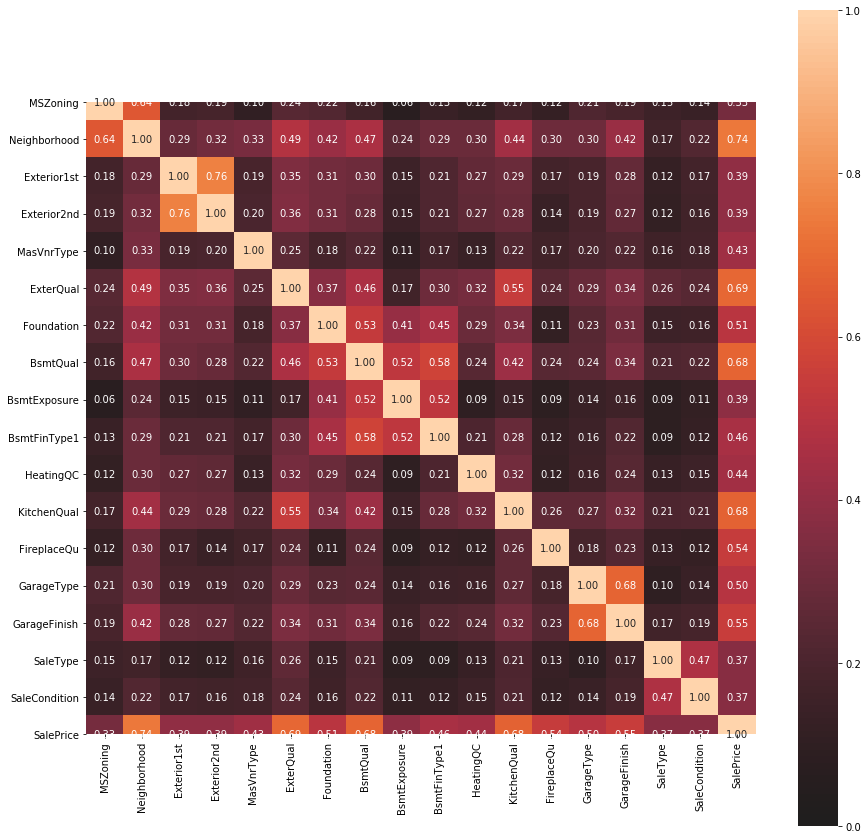

In [18]:
assoc2=associations(cat_df[cat_selected.index],figsize=(15,15))

We can also see strong relationship between some of these variables. we will remove those who are not suitable for our model based on their correlation rate with SalePrice and our self understanding on how tey can be relevant

So, we will remove:

    MSZoning
    Foundation
    BsmtQual
    Exterior2nd
    Exterior1st
    BsmtExposure
    BsmtFinType1

In [19]:
cat_df=cat_df[cat_selected.index]
cat_df=cat_df.drop(['MSZoning','Foundation','BsmtQual','Exterior2nd','Exterior1st','BsmtExposure','BsmtFinType1'],axis=1)
cat_df

,Neighborhood,MasVnrType,ExterQual,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition,SalePrice
0,CollgCr,BrkFace,Gd,Ex,Gd,0,Attchd,RFn,WD,Normal,208500
1,Veenker,None,TA,Ex,TA,TA,Attchd,RFn,WD,Normal,181500
2,CollgCr,BrkFace,Gd,Ex,Gd,TA,Attchd,RFn,WD,Normal,223500
3,Crawfor,None,TA,Gd,Gd,Gd,Detchd,Unf,WD,Abnorml,140000
4,NoRidge,BrkFace,Gd,Ex,Gd,TA,Attchd,RFn,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,None,TA,Ex,TA,TA,Attchd,RFn,WD,Normal,175000
1456,NWAmes,Stone,TA,TA,TA,TA,Attchd,Unf,WD,Normal,210000
1457,Crawfor,None,Ex,Ex,Gd,Gd,Attchd,RFn,WD,Normal,266500
1458,NAmes,None,TA,Gd,Gd,0,Attchd,Unf,WD,Normal,142125


so far our selected features are 

In [20]:
num_df.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [21]:
selected=num_df.columns
cat_selected=cat_df.columns
selected=selected.append(cat_selected)

In [22]:
selected.drop_duplicates()

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'Neighborhood', 'MasVnrType', 'ExterQual', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [23]:
selected=selected.drop_duplicates()
selected

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF',
       'GrLivArea', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'Neighborhood', 'MasVnrType', 'ExterQual', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [24]:
selected_index=selected
selected_index=np.array(selected_index)

In [25]:
np.put(selected_index,[0,selected_index.size-1],['SalePrice'])

In [26]:
x_df=train_df[selected]

In [27]:
x_df

,LotFrontage,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,...,Neighborhood,MasVnrType,ExterQual,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,65.0,7,2003,196.0,856,1710,0,2,0,61,...,CollgCr,BrkFace,Gd,Ex,Gd,NaN,Attchd,RFn,WD,Normal
1,80.0,6,1976,0.0,1262,1262,1,2,298,0,...,Veenker,None,TA,Ex,TA,TA,Attchd,RFn,WD,Normal
2,68.0,7,2001,162.0,920,1786,1,2,0,42,...,CollgCr,BrkFace,Gd,Ex,Gd,TA,Attchd,RFn,WD,Normal
3,60.0,7,1915,0.0,756,1717,1,3,0,35,...,Crawfor,None,TA,Gd,Gd,Gd,Detchd,Unf,WD,Abnorml
4,84.0,8,2000,350.0,1145,2198,1,3,192,84,...,NoRidge,BrkFace,Gd,Ex,Gd,TA,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,0.0,953,1647,1,2,0,40,...,Gilbert,None,TA,Ex,TA,TA,Attchd,RFn,WD,Normal
1456,85.0,6,1978,119.0,1542,2073,2,2,349,0,...,NWAmes,Stone,TA,TA,TA,TA,Attchd,Unf,WD,Normal
1457,66.0,7,1941,0.0,1152,2340,2,1,0,60,...,Crawfor,None,Ex,Ex,Gd,Gd,Attchd,RFn,WD,Normal
1458,68.0,5,1950,0.0,1078,1078,0,1,366,0,...,NAmes,None,TA,Gd,Gd,NaN,Attchd,Unf,WD,Normal


### Let's first get ride of missing data

In [28]:
x_df.isnull().sum()/len(x_df)

LotFrontage      0.177397
OverallQual      0.000000
YearBuilt        0.000000
MasVnrArea       0.005479
TotalBsmtSF      0.000000
GrLivArea        0.000000
Fireplaces       0.000000
GarageCars       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
SalePrice        0.000000
Neighborhood     0.000000
MasVnrType       0.005479
ExterQual        0.000000
HeatingQC        0.000000
KitchenQual      0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
SaleType         0.000000
SaleCondition    0.000000
dtype: float64

We will take down all the columns having more than 20% of missong data.

So, we will delete FireplaceQu

In [29]:
x_df=x_df.drop(['FireplaceQu'],axis=1)

Now let's fill the missing datas for the remaining columns.

we will fill numerical variables with the median and categorical variables with the mode

In [30]:
x_df.LotFrontage=x_df.LotFrontage.fillna(x_df.LotFrontage.dropna().median())

In [31]:
x_df['MasVnrArea']=x_df['MasVnrArea'].fillna(x_df.MasVnrArea.dropna().median())

In [32]:
x_df['MasVnrType']=x_df['MasVnrType'].fillna(x_df.MasVnrType.dropna().mode()[0])

In [33]:
x_df['GarageType']=x_df['GarageType'].fillna(x_df.GarageType.dropna().mode()[0])

In [34]:
x_df['GarageFinish']=x_df['GarageFinish'].fillna(x_df.GarageFinish.dropna().mode()[0])

In [35]:
x_df.isnull().sum()/len(x_df)

LotFrontage      0.0
OverallQual      0.0
YearBuilt        0.0
MasVnrArea       0.0
TotalBsmtSF      0.0
GrLivArea        0.0
Fireplaces       0.0
GarageCars       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
SalePrice        0.0
Neighborhood     0.0
MasVnrType       0.0
ExterQual        0.0
HeatingQC        0.0
KitchenQual      0.0
GarageType       0.0
GarageFinish     0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [36]:
x_df

,LotFrontage,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Neighborhood,MasVnrType,ExterQual,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,65.0,7,2003,196.0,856,1710,0,2,0,61,208500,CollgCr,BrkFace,Gd,Ex,Gd,Attchd,RFn,WD,Normal
1,80.0,6,1976,0.0,1262,1262,1,2,298,0,181500,Veenker,None,TA,Ex,TA,Attchd,RFn,WD,Normal
2,68.0,7,2001,162.0,920,1786,1,2,0,42,223500,CollgCr,BrkFace,Gd,Ex,Gd,Attchd,RFn,WD,Normal
3,60.0,7,1915,0.0,756,1717,1,3,0,35,140000,Crawfor,None,TA,Gd,Gd,Detchd,Unf,WD,Abnorml
4,84.0,8,2000,350.0,1145,2198,1,3,192,84,250000,NoRidge,BrkFace,Gd,Ex,Gd,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,0.0,953,1647,1,2,0,40,175000,Gilbert,None,TA,Ex,TA,Attchd,RFn,WD,Normal
1456,85.0,6,1978,119.0,1542,2073,2,2,349,0,210000,NWAmes,Stone,TA,TA,TA,Attchd,Unf,WD,Normal
1457,66.0,7,1941,0.0,1152,2340,2,1,0,60,266500,Crawfor,None,Ex,Ex,Gd,Attchd,RFn,WD,Normal
1458,68.0,5,1950,0.0,1078,1078,0,1,366,0,142125,NAmes,None,TA,Gd,Gd,Attchd,Unf,WD,Normal


Ok Great. Now we will observe our variables closer in other to find hidden features and understand them a bite more

#### Describing numerical variables

In [37]:
x_df.describe()

,LotFrontage,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,6.099315,1971.267808,103.117123,1057.429452,1515.463699,0.613014,1.767123,94.244521,46.660274,180921.195890
std,22.027677,1.382997,30.202904,180.731373,438.705324,525.480383,0.644666,0.747315,125.338794,66.256028,79442.502883
min,21.000000,1.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,5.000000,1954.000000,0.000000,795.750000,1129.500000,0.000000,1.000000,0.000000,0.000000,129975.000000
50%,69.000000,6.000000,1973.000000,0.000000,991.500000,1464.000000,1.000000,2.000000,0.000000,25.000000,163000.000000
75%,79.000000,7.000000,2000.000000,164.250000,1298.250000,1776.750000,1.000000,2.000000,168.000000,68.000000,214000.000000
max,313.000000,10.000000,2010.000000,1600.000000,6110.000000,5642.000000,3.000000,4.000000,857.000000,547.000000,755000.000000


#### Describing categorical variables

In [38]:
x_df.describe(include=['O'])

,Neighborhood,MasVnrType,ExterQual,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,25,4,4,5,4,6,3,9,6
top,NAmes,None,TA,Ex,TA,Attchd,Unf,WD,Normal
freq,225,872,906,741,735,951,686,1267,1198


Lest's first look at the numerical variables

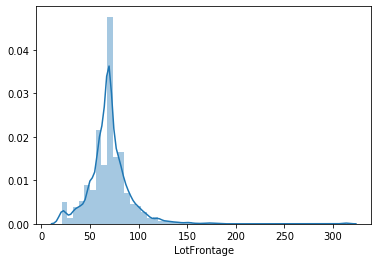

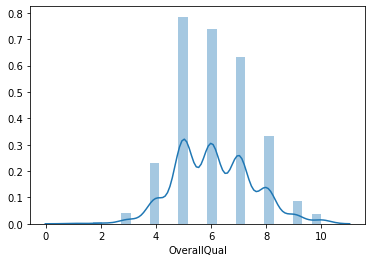

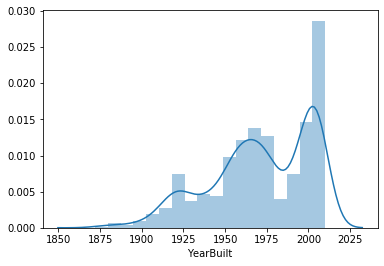

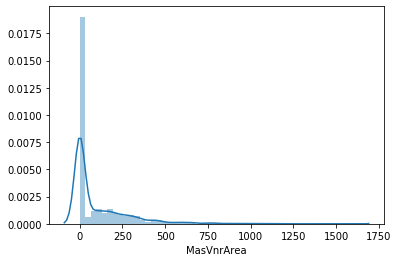

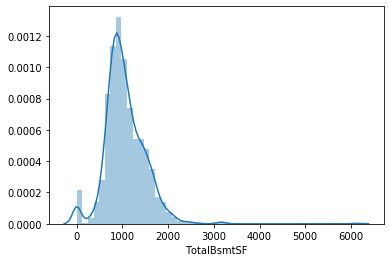

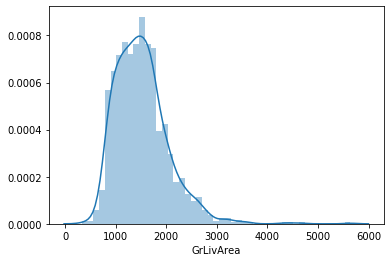

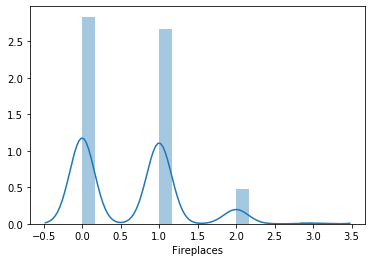

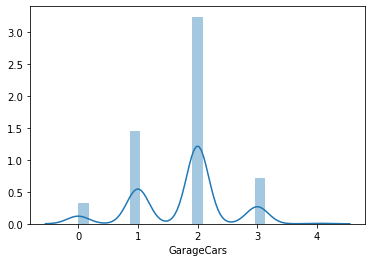

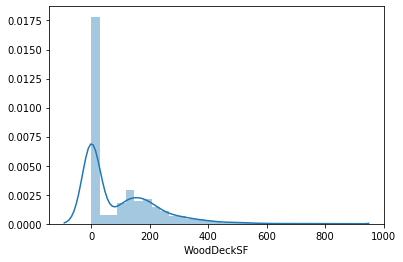

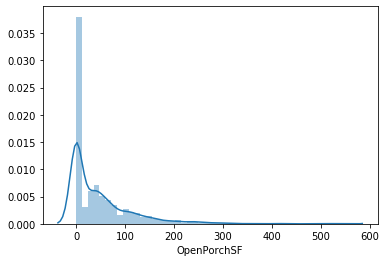

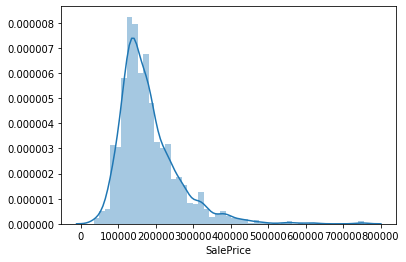

In [39]:
for colname in x_df.describe().columns:
    sns.distplot(x_df[colname])
    #x_df[colname].hist()
    plt.show()

We can observe that variables like **OverallQual, YearBuilt, FirePlaces, GarageCars** should be treated as categorical variables and some need to be transformed

Most of the numerical variables have to be normalized in other to fit most of the regression models

Let's look at how our numerical variables looks when associated with eachother

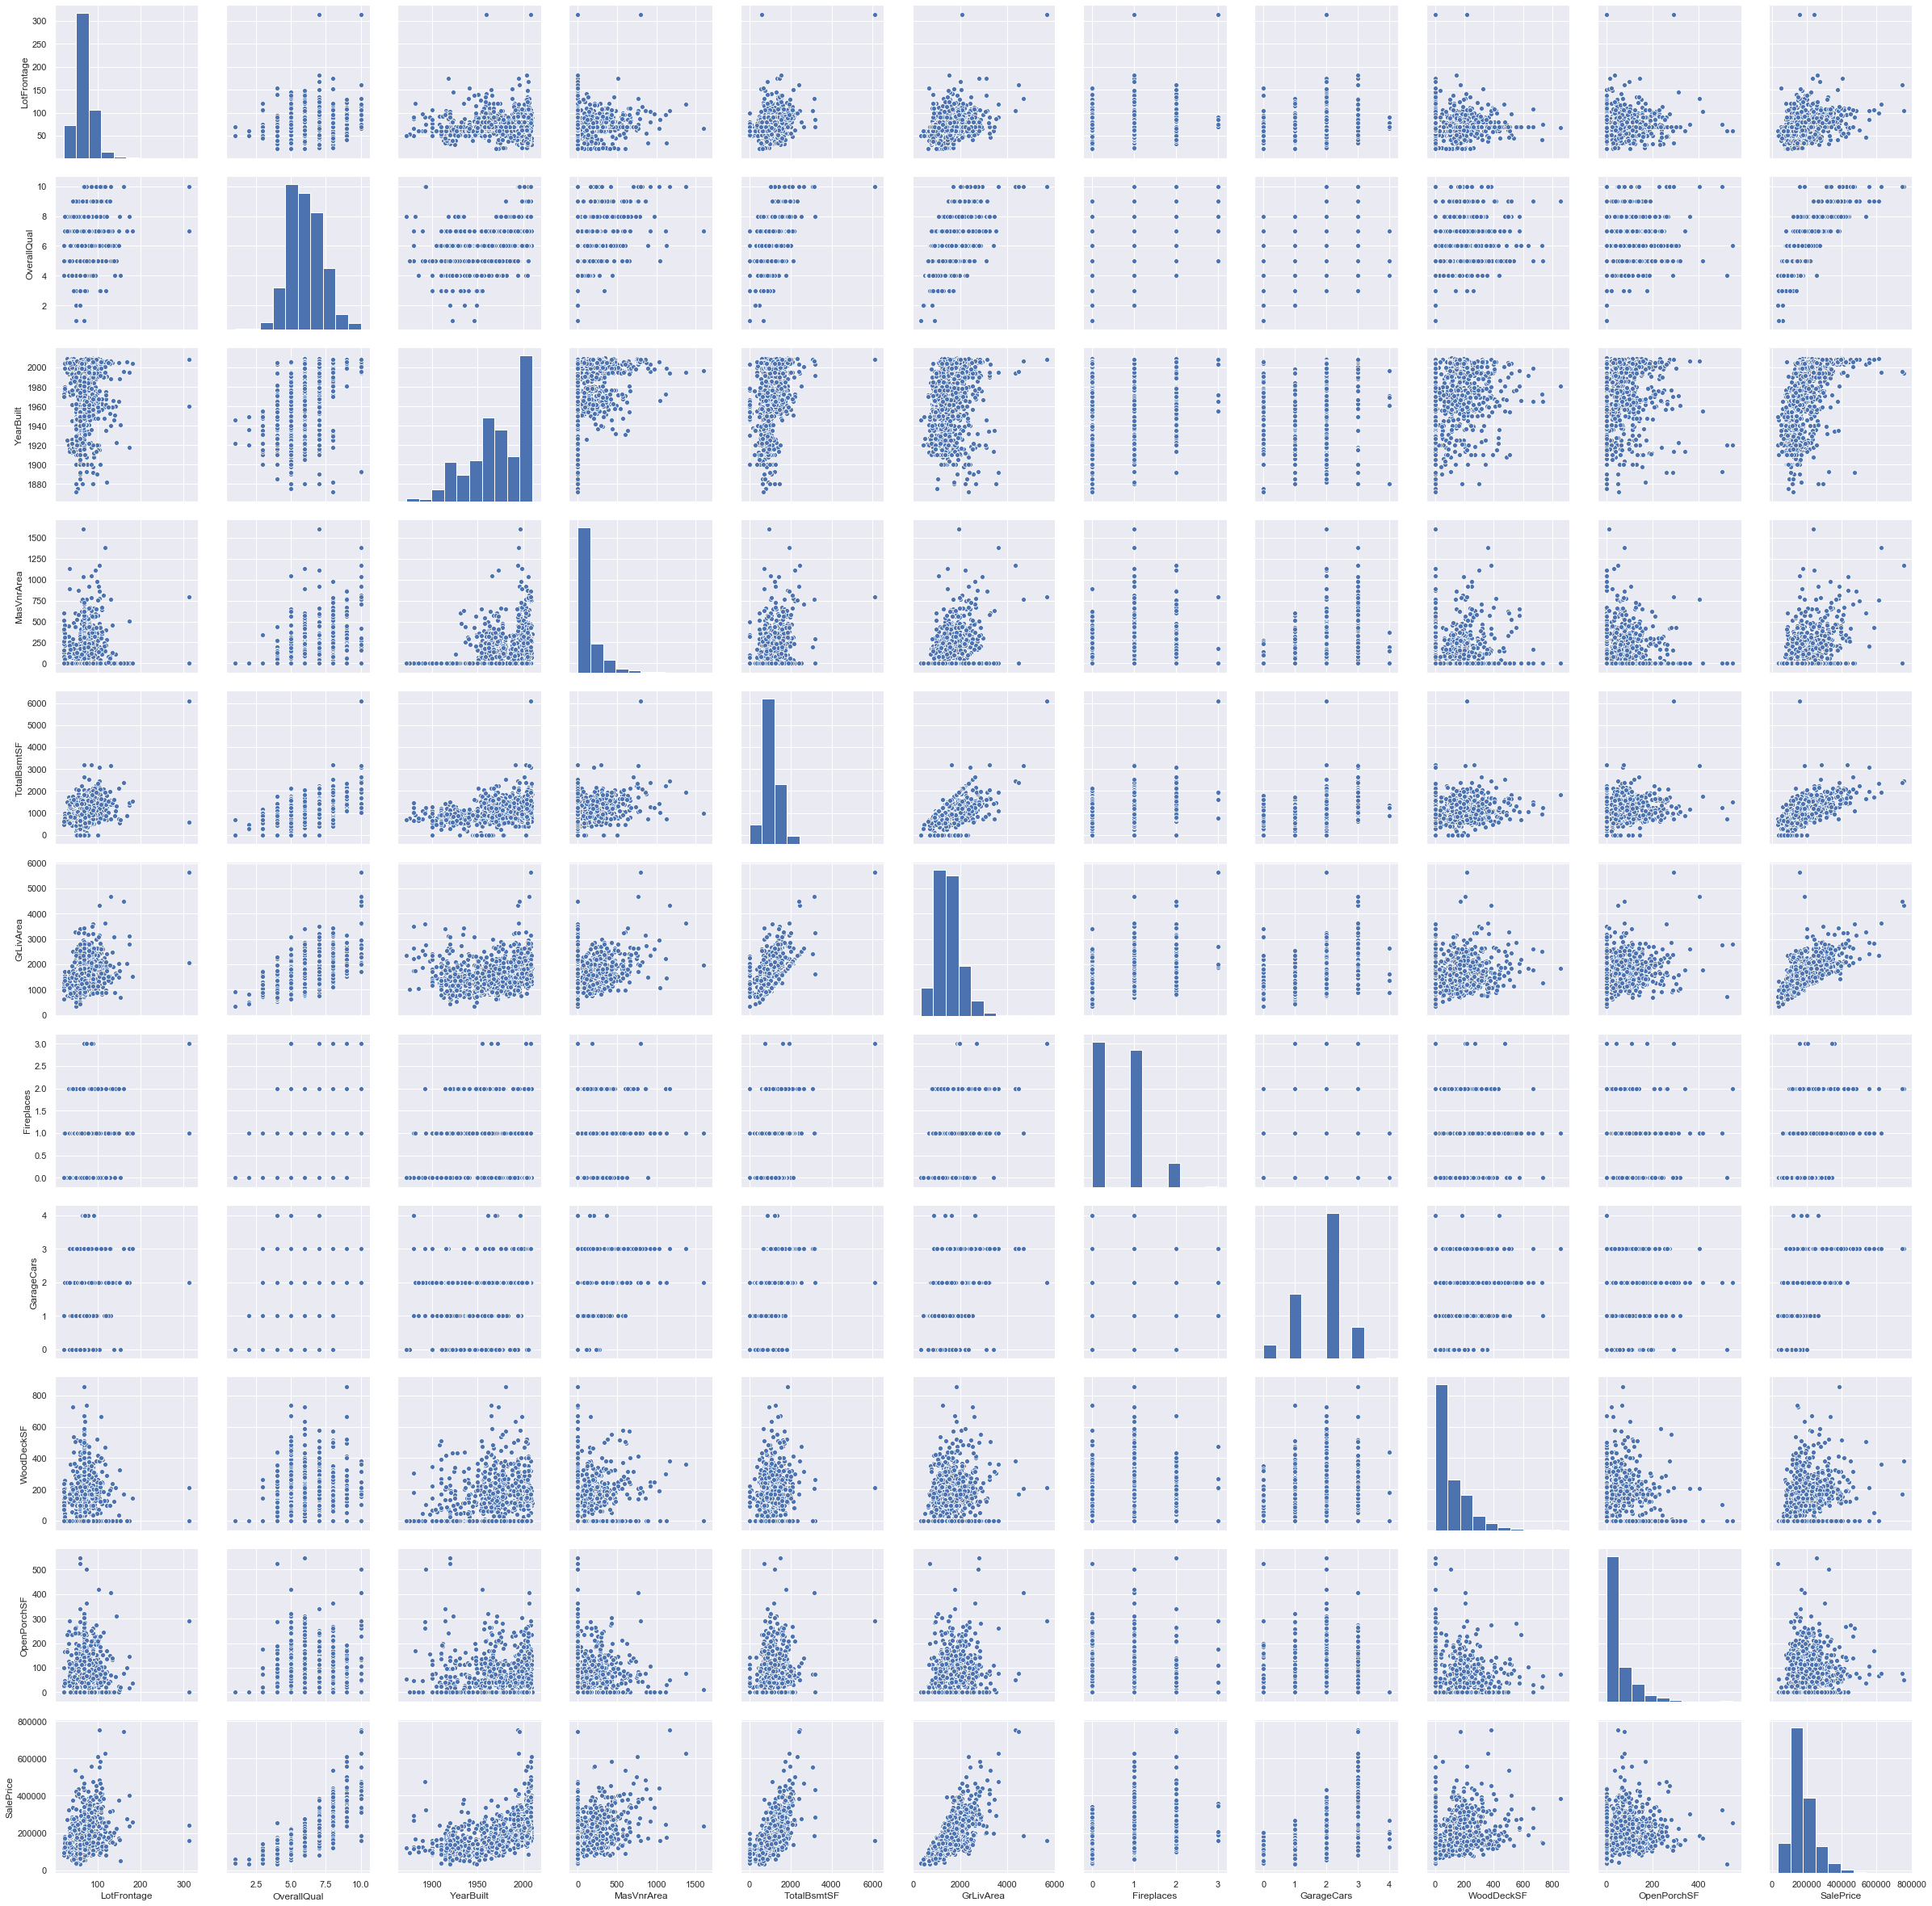

In [40]:
sns.set()
sns.pairplot(x_df[x_df.describe().columns], size = 3)
plt.show();

We observe that WoodDecSF, OpenPorchSF and MasVnrArea also need to be transformed if not dropped because it is hard to find correlation with SalePrice like this. We can clearly see that the variables can be lookd at as having or not having the corresponding feature

We will transform those variables into boolean variables and observ them

Let's look at those variables
    
We will start with **MasVnrArea**

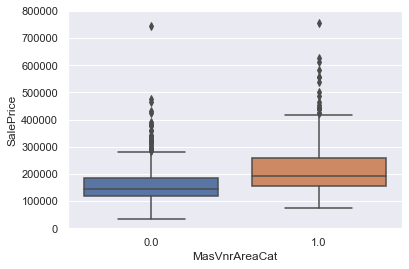

In [41]:
x_df.loc[x_df.MasVnrArea!=0,'MasVnrAreaCat']=1
x_df.loc[x_df.MasVnrArea==0,'MasVnrAreaCat']=0

var = 'MasVnrAreaCat'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
#f, ax = plt.subplots(figsize=(18, 16))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**WoodDecSF**

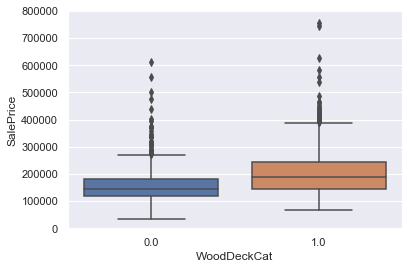

In [42]:
x_df.loc[x_df.WoodDeckSF!=0,'WoodDeckCat']=1
x_df.loc[x_df.WoodDeckSF==0,'WoodDeckCat']=0

var = 'WoodDeckCat'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
#f, ax = plt.subplots(figsize=(18, 16))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**OpenPorchSF**

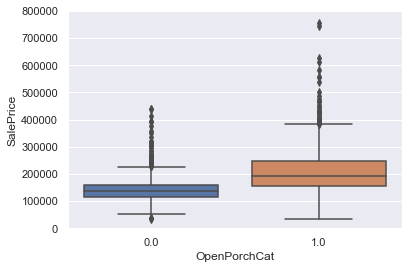

In [43]:
x_df.loc[x_df.OpenPorchSF!=0,'OpenPorchCat']=1
x_df.loc[x_df.OpenPorchSF==0,'OpenPorchCat']=0

var = 'OpenPorchCat'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
#f, ax = plt.subplots(figsize=(18, 16))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

We see that these transformed categorical variables are much more relevent to predict SalePrice we will drop the initial ones and keep the created categorical ones

Now let's look at OverallQual, YearBuilt, FirePlaces and GarageCars 

**OverallQual**

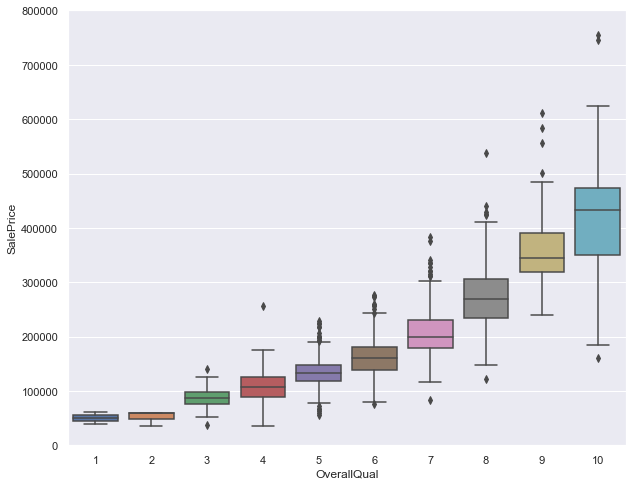

In [44]:
var = 'OverallQual'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**Fireplaces**

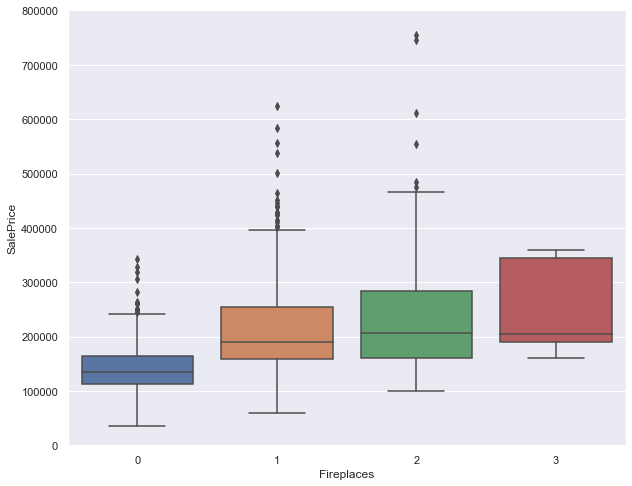

In [45]:
var = 'Fireplaces'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**GarageCars**

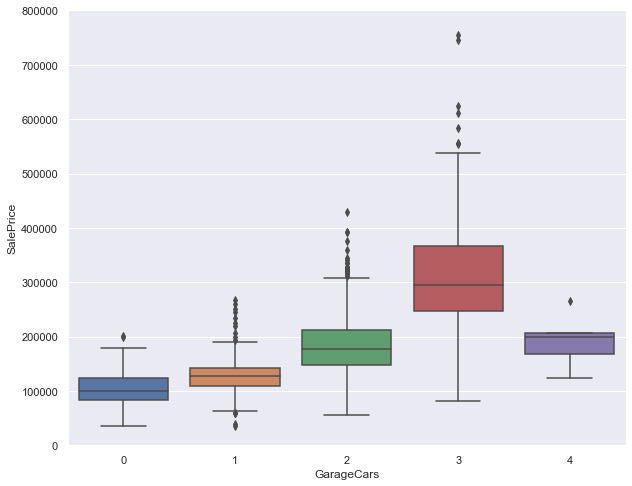

In [46]:
var = 'GarageCars'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**YearBuilt**

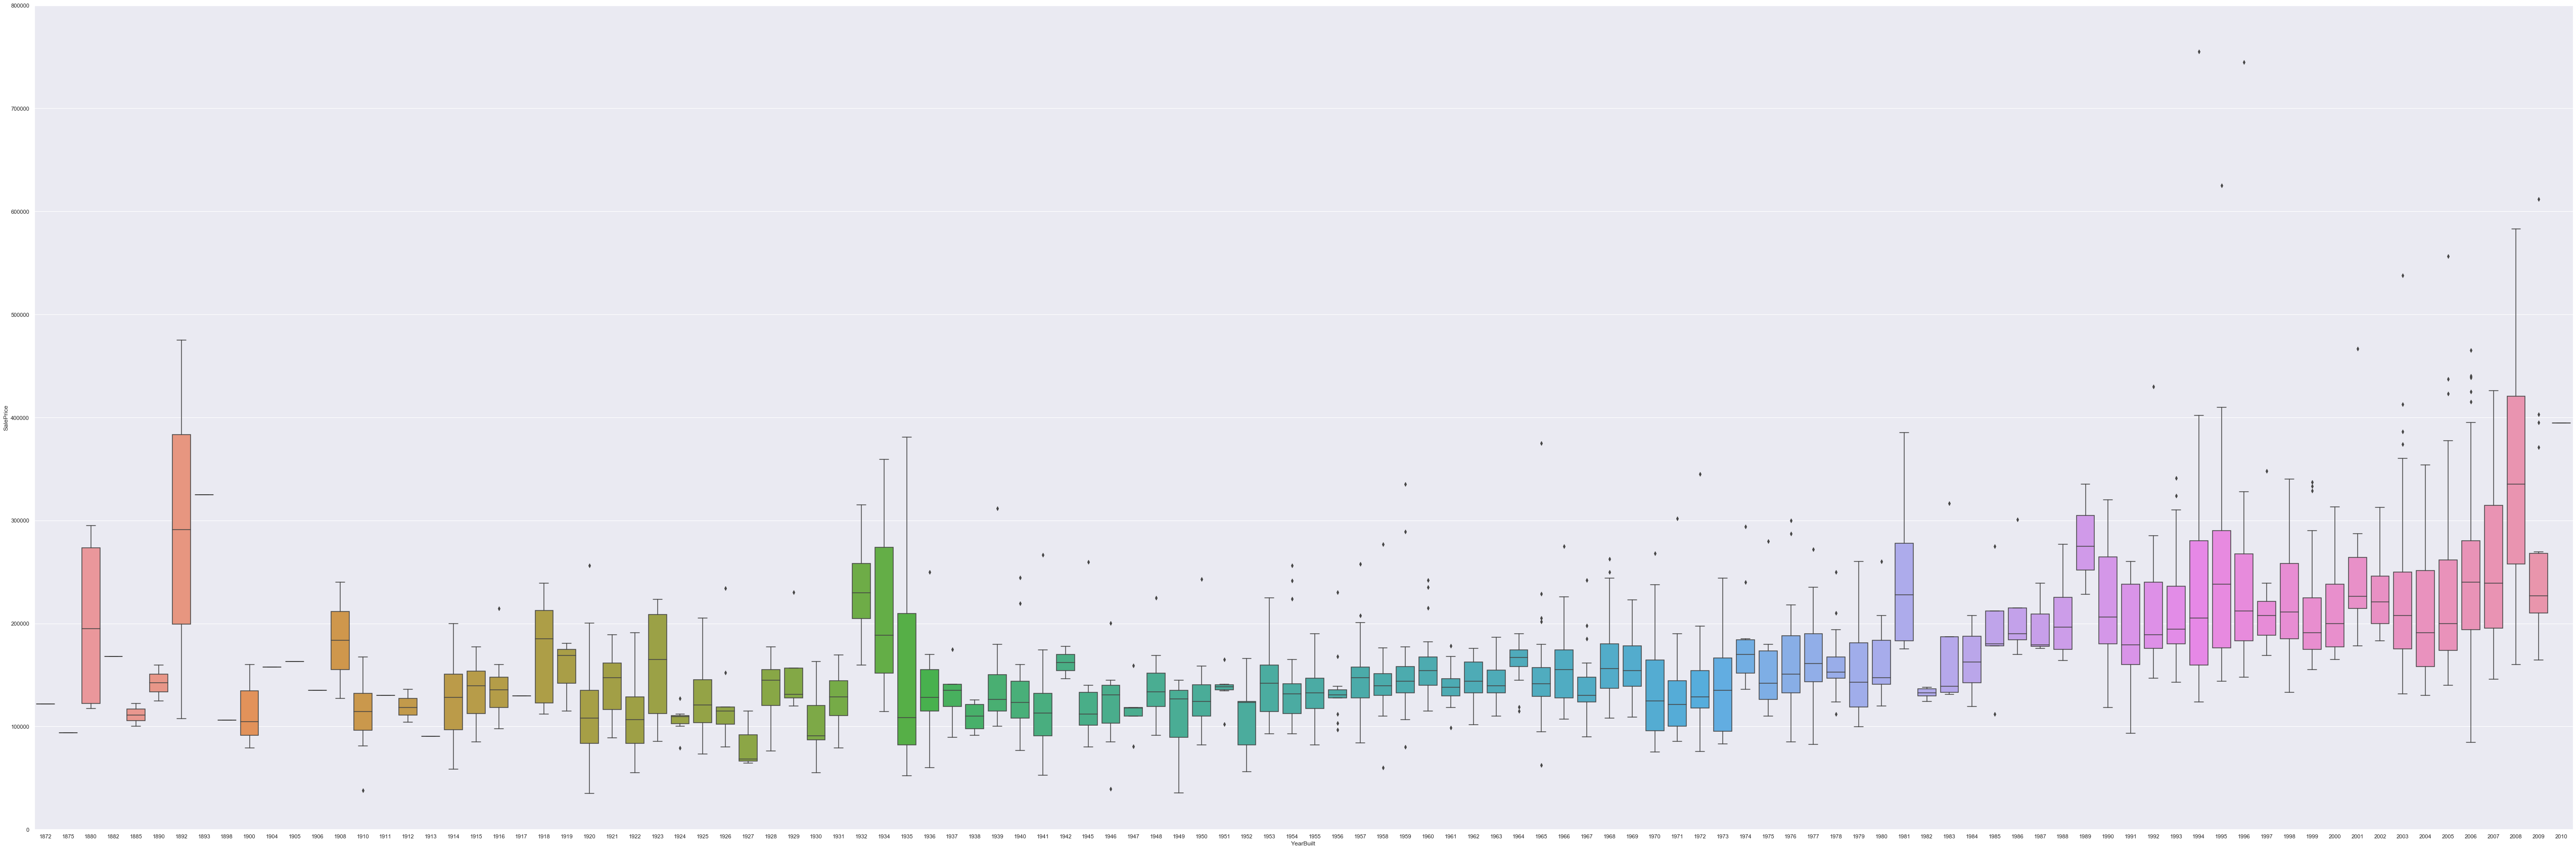

In [47]:
var = 'YearBuilt'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
f, ax = plt.subplots(figsize=(90, 30))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

We can observe about 5-6 categories of YearBuilt. I think it'll be more visible on the catplot down 


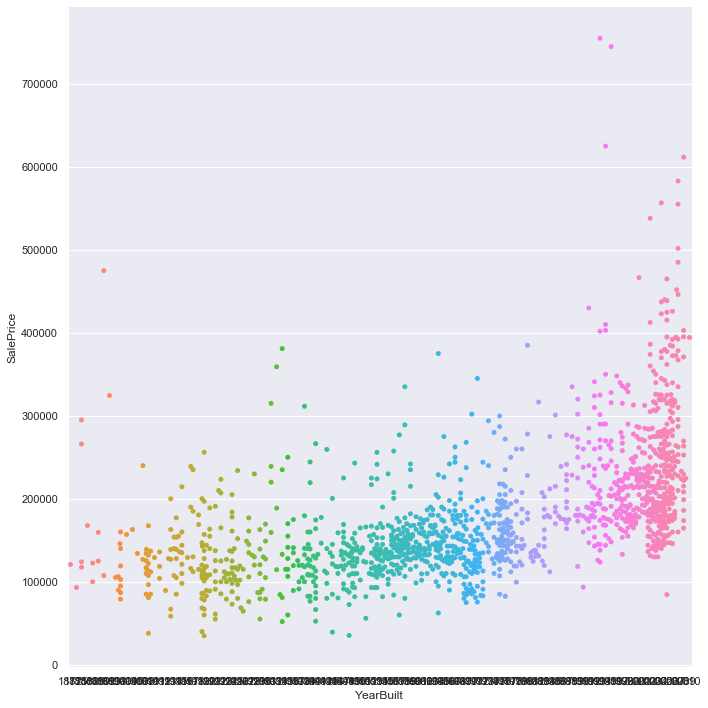

In [48]:
sns.catplot(data=x_df,x='YearBuilt',y='SalePrice',kind='swarm',height=10)

the different intervals we can notice after zooming on the plot are:

    1872-1890
    1891-1931
    1932-1936
    1937-1981
    1982-2010

Since we are dealing with years, we will transform our intervals in decades:

    1870-1890
    1890-1930
    1930-1935
    1935-1980
    1980-2010
Let's create our new categorical feature

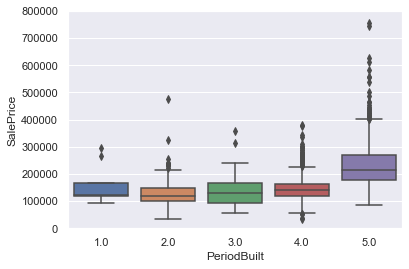

In [49]:
x_df.loc[(x_df.YearBuilt>=1870) & (x_df.YearBuilt< 1890),'PeriodBuilt']=1
x_df.loc[(x_df.YearBuilt>=1890) & (x_df.YearBuilt< 1930),'PeriodBuilt']=2
x_df.loc[(x_df.YearBuilt>=1930) & (x_df.YearBuilt< 1935),'PeriodBuilt']=3
x_df.loc[(x_df.YearBuilt>=1935) & (x_df.YearBuilt< 1980),'PeriodBuilt']=4
x_df.loc[x_df.YearBuilt>=1980,'PeriodBuilt']=5

var = 'PeriodBuilt'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
#f, ax = plt.subplots(figsize=(90, 30))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Looking closer, we can bring it down to 3 categories:

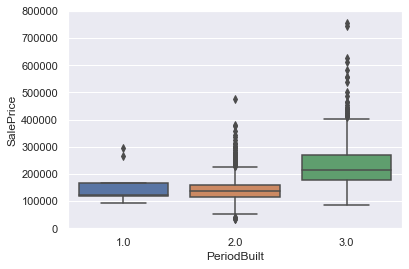

In [50]:
x_df.loc[(x_df.YearBuilt>=1870) & (x_df.YearBuilt< 1890),'PeriodBuilt']=1
x_df.loc[(x_df.YearBuilt>=1890) & (x_df.YearBuilt<= 1980),'PeriodBuilt']=2
x_df.loc[x_df.YearBuilt>1980,'PeriodBuilt']=3

var = 'PeriodBuilt'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
#f, ax = plt.subplots(figsize=(90, 30))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Now let's remove the unwanted features

In [51]:
x_df=x_df.drop(['YearBuilt','WoodDeckSF', 'OpenPorchSF', 'MasVnrArea'], axis=1)
x_df

,LotFrontage,OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,SalePrice,Neighborhood,MasVnrType,ExterQual,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,MasVnrAreaCat,WoodDeckCat,OpenPorchCat,PeriodBuilt
0,65.0,7,856,1710,0,2,208500,CollgCr,BrkFace,Gd,Ex,Gd,Attchd,RFn,WD,Normal,1.0,0.0,1.0,3.0
1,80.0,6,1262,1262,1,2,181500,Veenker,None,TA,Ex,TA,Attchd,RFn,WD,Normal,0.0,1.0,0.0,2.0
2,68.0,7,920,1786,1,2,223500,CollgCr,BrkFace,Gd,Ex,Gd,Attchd,RFn,WD,Normal,1.0,0.0,1.0,3.0
3,60.0,7,756,1717,1,3,140000,Crawfor,None,TA,Gd,Gd,Detchd,Unf,WD,Abnorml,0.0,0.0,1.0,2.0
4,84.0,8,1145,2198,1,3,250000,NoRidge,BrkFace,Gd,Ex,Gd,Attchd,RFn,WD,Normal,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,953,1647,1,2,175000,Gilbert,None,TA,Ex,TA,Attchd,RFn,WD,Normal,0.0,0.0,1.0,3.0
1456,85.0,6,1542,2073,2,2,210000,NWAmes,Stone,TA,TA,TA,Attchd,Unf,WD,Normal,1.0,1.0,0.0,2.0
1457,66.0,7,1152,2340,2,1,266500,Crawfor,None,Ex,Ex,Gd,Attchd,RFn,WD,Normal,0.0,0.0,1.0,2.0
1458,68.0,5,1078,1078,0,1,142125,NAmes,None,TA,Gd,Gd,Attchd,Unf,WD,Normal,0.0,1.0,0.0,2.0


### Categorical variables

let's observe them with barcharts and boxplote

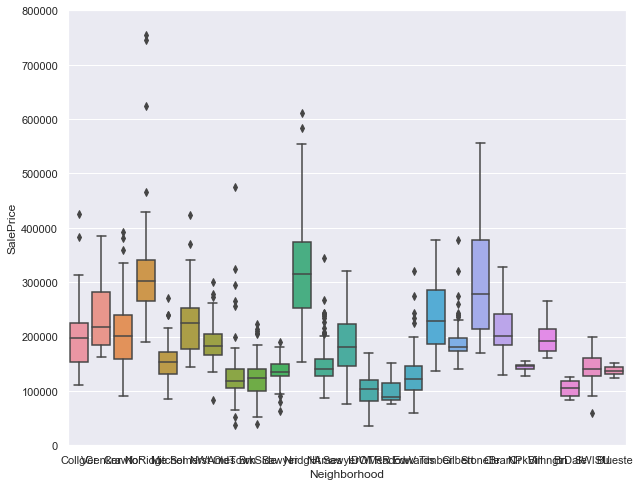

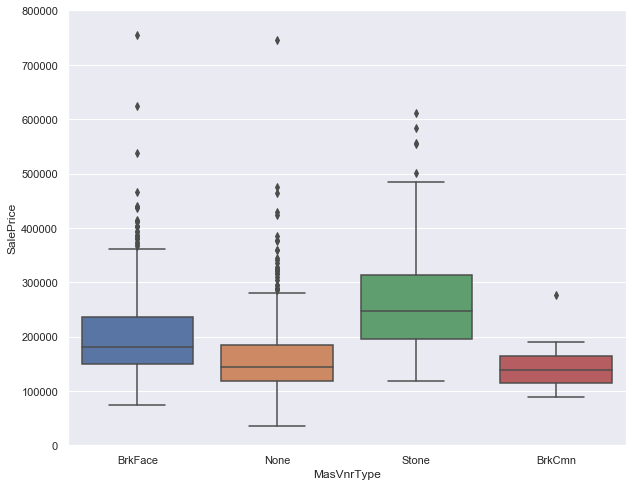

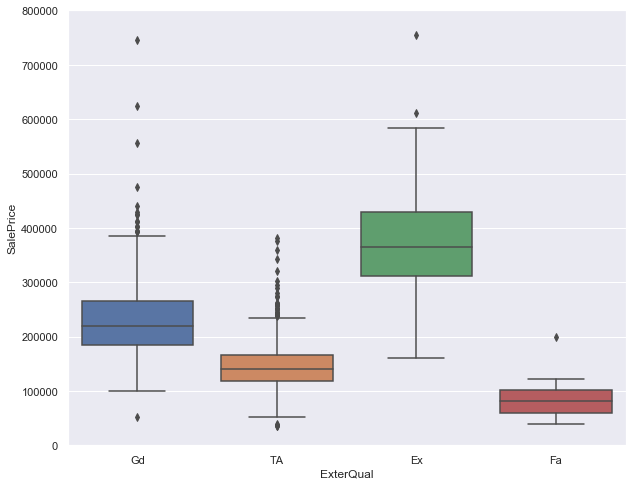

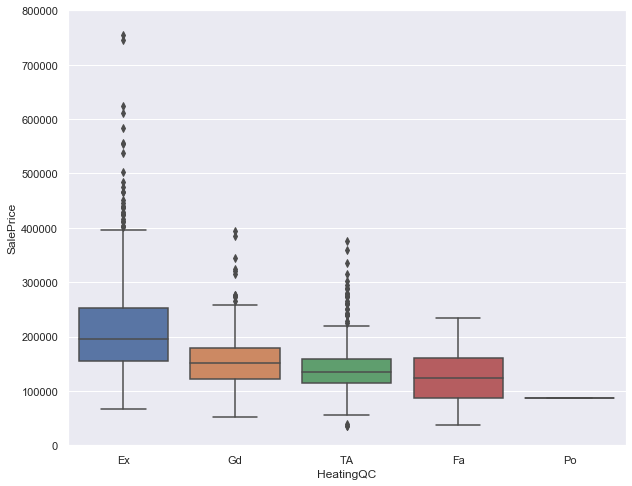

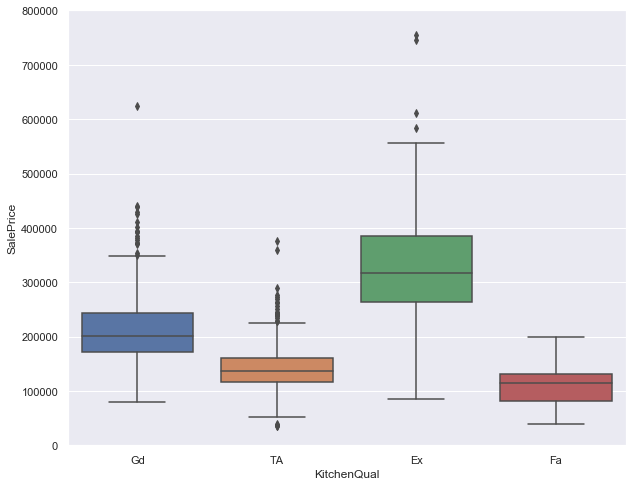

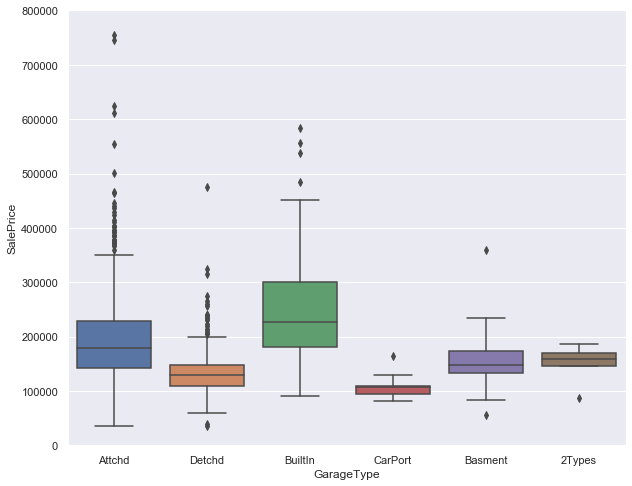

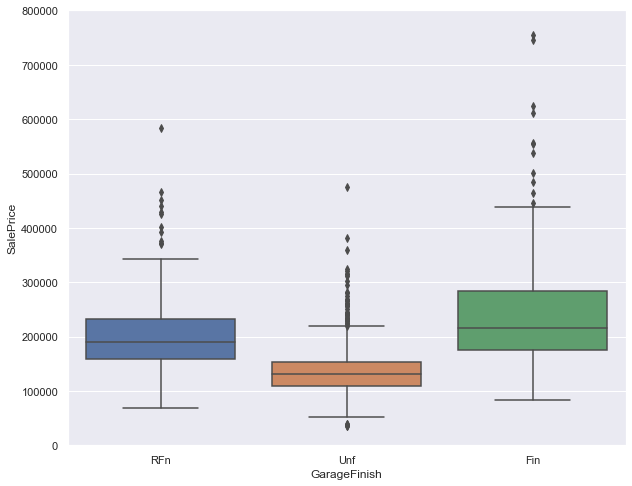

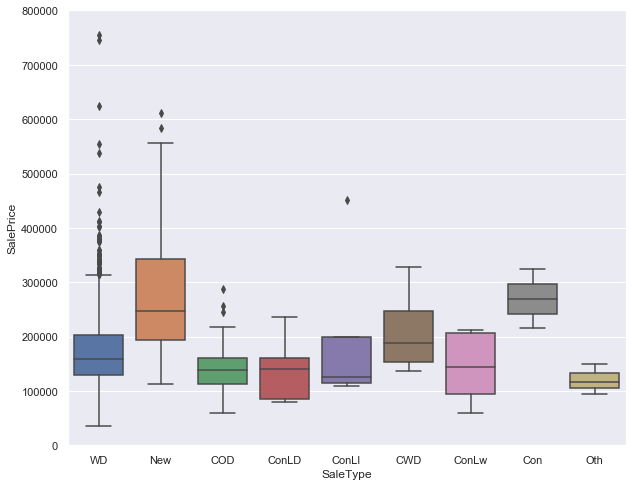

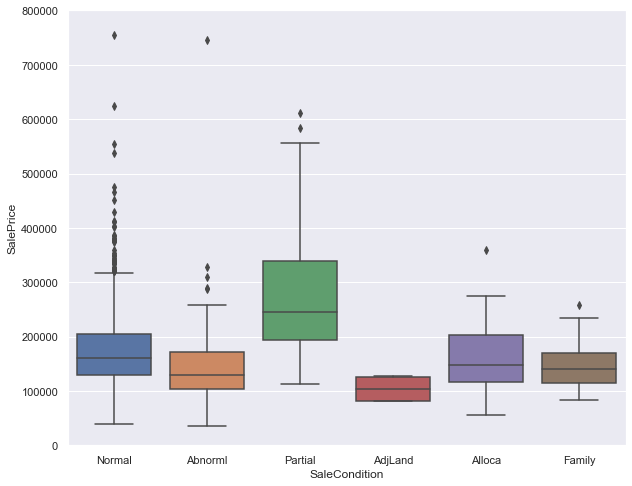

In [52]:
for colname in x_df.describe(include=['O']).columns:
    var = colname
    data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
    f, ax = plt.subplots(figsize=(10, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.show()

Some variables need to be made ordinal as :

    SaleCondition
    SaleType
    GarageFinish
    GarageType
    KitchenQual
    HeatingQC
    ExterQual
    MasVnrType
**Neighborhood** needs to be groupped first before made ordinal

In [53]:
## MasVnrType
x_df.loc[x_df.MasVnrType=='None','MasVnrType']=1
x_df.loc[x_df.MasVnrType=='BrkCmn','MasVnrType']=2
x_df.loc[x_df.MasVnrType=='BrkFace','MasVnrType']=3
x_df.loc[x_df.MasVnrType=='Stone','MasVnrType']=4

## ExterQual
x_df.loc[x_df.ExterQual=='Fa','ExterQual']=1
x_df.loc[x_df.ExterQual=='TA','ExterQual']=2
x_df.loc[x_df.ExterQual=='Gd','ExterQual']=3
x_df.loc[x_df.ExterQual=='Ex','ExterQual']=4

## HeatingQC
x_df.loc[x_df.HeatingQC=='Po','HeatingQC']=1
x_df.loc[x_df.HeatingQC=='Fa','HeatingQC']=2
x_df.loc[x_df.HeatingQC=='TA','HeatingQC']=3
x_df.loc[x_df.HeatingQC=='Gd','HeatingQC']=4
x_df.loc[x_df.HeatingQC=='Ex','HeatingQC']=5

## KitchenQual
x_df.loc[x_df.KitchenQual=='Fa','KitchenQual']=1
x_df.loc[x_df.KitchenQual=='TA','KitchenQual']=2
x_df.loc[x_df.KitchenQual=='Gd','KitchenQual']=3
x_df.loc[x_df.KitchenQual=='Ex','KitchenQual']=4

## GarageType
x_df.loc[x_df.GarageType=='CarPort','GarageType']=1
x_df.loc[x_df.GarageType=='Detchd','GarageType']=2
x_df.loc[x_df.GarageType=='Basment','GarageType']=3
x_df.loc[x_df.GarageType=='2Types','GarageType']=4
x_df.loc[x_df.GarageType=='Attchd','GarageType']=5
x_df.loc[x_df.GarageType=='BuiltIn','GarageType']=6

## GarageFinish
x_df.loc[x_df.GarageFinish=='Unf','GarageFinish']=1
x_df.loc[x_df.GarageFinish=='RFn','GarageFinish']=2
x_df.loc[x_df.GarageFinish=='Fin','GarageFinish']=3

## SaleType
x_df.loc[x_df.SaleType=='Oth','SaleType']=1
x_df.loc[(x_df.SaleType=='ConLD')| (x_df.SaleType=='ConLI')|(x_df.SaleType=='ConLw'),'SaleType']=2
x_df.loc[(x_df.SaleType=='WD')|(x_df.SaleType=='CWD')|(x_df.SaleType=='VWD')|(x_df.SaleType=='COD'),'SaleType']=3
x_df.loc[x_df.SaleType=='Con','SaleType']=4
x_df.loc[x_df.SaleType=='New','SaleType']=5

## SaleCondition
x_df.loc[x_df.SaleCondition=='AdjLand','SaleCondition']=1
x_df.loc[x_df.SaleCondition=='Abnorml','SaleCondition']=2
x_df.loc[x_df.SaleCondition=='Family','SaleCondition']=3
x_df.loc[x_df.SaleCondition=='Alloca','SaleCondition']=4
x_df.loc[x_df.SaleCondition=='Normal','SaleCondition']=5
x_df.loc[x_df.SaleCondition=='Partial','SaleCondition']=6

x_df

,LotFrontage,OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,SalePrice,Neighborhood,MasVnrType,ExterQual,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,MasVnrAreaCat,WoodDeckCat,OpenPorchCat,PeriodBuilt
0,65.0,7,856,1710,0,2,208500,CollgCr,3,3,5,3,5,2,3,5,1.0,0.0,1.0,3.0
1,80.0,6,1262,1262,1,2,181500,Veenker,1,2,5,2,5,2,3,5,0.0,1.0,0.0,2.0
2,68.0,7,920,1786,1,2,223500,CollgCr,3,3,5,3,5,2,3,5,1.0,0.0,1.0,3.0
3,60.0,7,756,1717,1,3,140000,Crawfor,1,2,4,3,2,1,3,2,0.0,0.0,1.0,2.0
4,84.0,8,1145,2198,1,3,250000,NoRidge,3,3,5,3,5,2,3,5,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,953,1647,1,2,175000,Gilbert,1,2,5,2,5,2,3,5,0.0,0.0,1.0,3.0
1456,85.0,6,1542,2073,2,2,210000,NWAmes,4,2,3,2,5,1,3,5,1.0,1.0,0.0,2.0
1457,66.0,7,1152,2340,2,1,266500,Crawfor,1,4,5,3,5,2,3,5,0.0,0.0,1.0,2.0
1458,68.0,5,1078,1078,0,1,142125,NAmes,1,2,4,3,5,1,3,5,0.0,1.0,0.0,2.0


**Neighborhood**

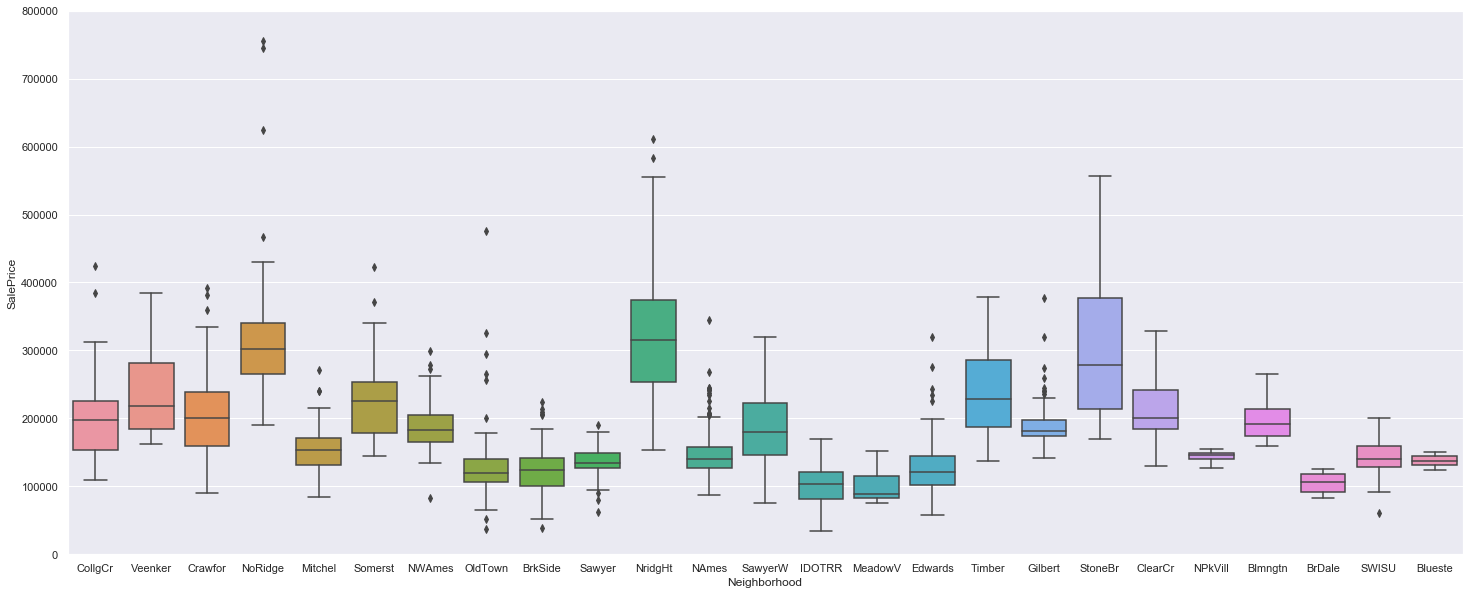

In [54]:
var = 'Neighborhood'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.show()

In [55]:
x_df[['Neighborhood','SalePrice']].groupby(['Neighborhood']).mean().sort_values(by='SalePrice',ascending=True)

,SalePrice
Neighborhood,
MeadowV,98576.470588
IDOTRR,100123.783784
BrDale,104493.750000
BrkSide,124834.051724
Edwards,128219.700000
OldTown,128225.300885
Sawyer,136793.135135
Blueste,137500.000000
SWISU,142591.360000


In [56]:
x_df[['Neighborhood','SalePrice']].groupby(['Neighborhood']).median().sort_values(by='SalePrice',ascending=True)

,SalePrice
Neighborhood,
MeadowV,88000
IDOTRR,103000
BrDale,106000
OldTown,119000
Edwards,121750
BrkSide,124300
Sawyer,135000
Blueste,137500
SWISU,139500


In [57]:
neighbor_dict={
    'MeadowV':1,
    'IDOTRR':1,
    'BrDale':1,
    'OldTown':1,
    'Edwards':1,
    'BrkSide':1,
    'Sawyer':1,
    'Blueste':1,
    'SWISU':1,
    'NAmes':1,
    'NPkVill':1,
    'Mitchel':1,
    'SawyerW':2,
    'Gilbert':2,
    'NWAmes':2,
    'Blmngtn':2,
    'CollgCr':2,
    'ClearCr':2,
    'Crawfor':2,
    'Veenker':3,
    'Somerst':3,
    'Timber':3,
    'StoneBr':4,
    'NoRidge':4,
    'NridgHt':4
}

x_df['Neighbor_ord']=x_df.Neighborhood.map(neighbor_dict)
x_df

,LotFrontage,OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,SalePrice,Neighborhood,MasVnrType,ExterQual,...,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,MasVnrAreaCat,WoodDeckCat,OpenPorchCat,PeriodBuilt,Neighbor_ord
0,65.0,7,856,1710,0,2,208500,CollgCr,3,3,...,3,5,2,3,5,1.0,0.0,1.0,3.0,2
1,80.0,6,1262,1262,1,2,181500,Veenker,1,2,...,2,5,2,3,5,0.0,1.0,0.0,2.0,3
2,68.0,7,920,1786,1,2,223500,CollgCr,3,3,...,3,5,2,3,5,1.0,0.0,1.0,3.0,2
3,60.0,7,756,1717,1,3,140000,Crawfor,1,2,...,3,2,1,3,2,0.0,0.0,1.0,2.0,2
4,84.0,8,1145,2198,1,3,250000,NoRidge,3,3,...,3,5,2,3,5,1.0,1.0,1.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,953,1647,1,2,175000,Gilbert,1,2,...,2,5,2,3,5,0.0,0.0,1.0,3.0,2
1456,85.0,6,1542,2073,2,2,210000,NWAmes,4,2,...,2,5,1,3,5,1.0,1.0,0.0,2.0,2
1457,66.0,7,1152,2340,2,1,266500,Crawfor,1,4,...,3,5,2,3,5,0.0,0.0,1.0,2.0,2
1458,68.0,5,1078,1078,0,1,142125,NAmes,1,2,...,3,5,1,3,5,0.0,1.0,0.0,2.0,1


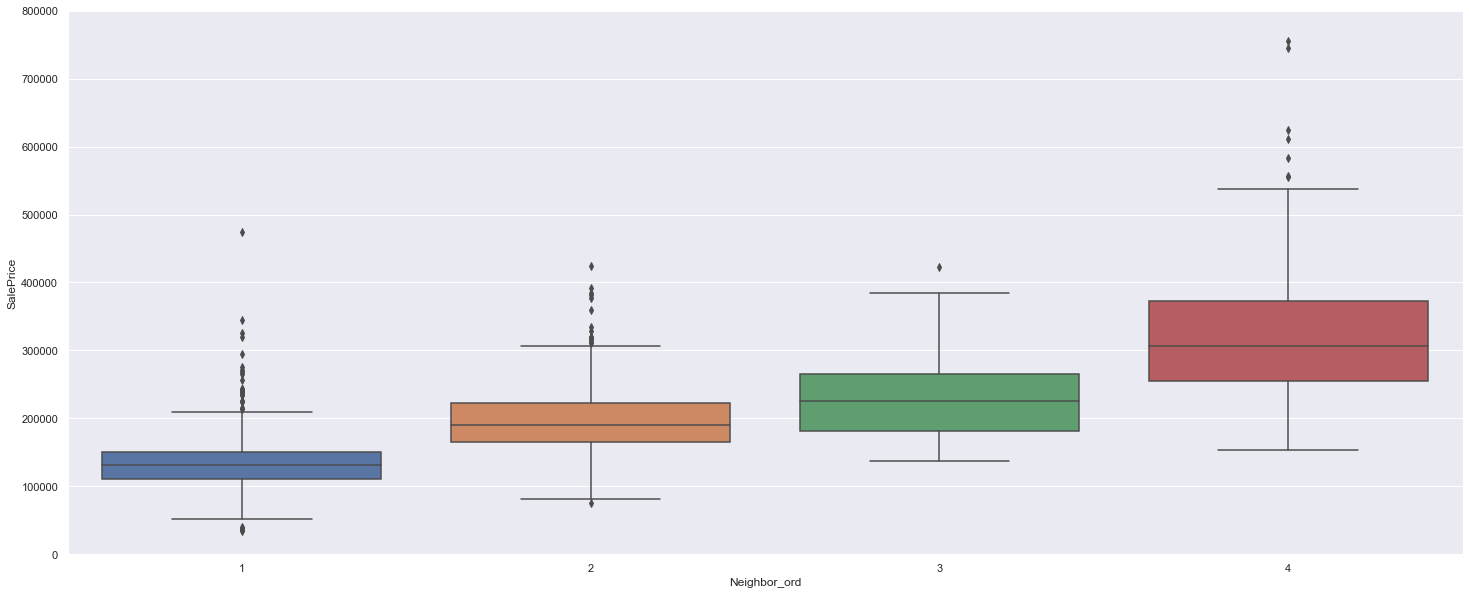

In [58]:
var = 'Neighbor_ord'
data = pd.concat([x_df['SalePrice'], x_df[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.show()

Since we have MasVnrType, we will remove MasVnrAreaCat

In [59]:
x_df=x_df.drop(['Neighborhood','MasVnrAreaCat'],axis=1)

In [60]:
x_df

,LotFrontage,OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,SalePrice,MasVnrType,ExterQual,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,WoodDeckCat,OpenPorchCat,PeriodBuilt,Neighbor_ord
0,65.0,7,856,1710,0,2,208500,3,3,5,3,5,2,3,5,0.0,1.0,3.0,2
1,80.0,6,1262,1262,1,2,181500,1,2,5,2,5,2,3,5,1.0,0.0,2.0,3
2,68.0,7,920,1786,1,2,223500,3,3,5,3,5,2,3,5,0.0,1.0,3.0,2
3,60.0,7,756,1717,1,3,140000,1,2,4,3,2,1,3,2,0.0,1.0,2.0,2
4,84.0,8,1145,2198,1,3,250000,3,3,5,3,5,2,3,5,1.0,1.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,953,1647,1,2,175000,1,2,5,2,5,2,3,5,0.0,1.0,3.0,2
1456,85.0,6,1542,2073,2,2,210000,4,2,3,2,5,1,3,5,1.0,0.0,2.0,2
1457,66.0,7,1152,2340,2,1,266500,1,4,5,3,5,2,3,5,0.0,1.0,2.0,2
1458,68.0,5,1078,1078,0,1,142125,1,2,4,3,5,1,3,5,1.0,0.0,2.0,1


periodBuilt is not ordinal. we will use onehot encoding to manage that feature in our dataset as it does not give any priority to any of the values

In [61]:
dummies=pd.get_dummies(x_df['PeriodBuilt'])
dummies=dummies.rename(columns={1:"Period_1",2:"Period_2",3:"Period_3"})
dummies=dummies.drop(['Period_3'],axis=1)
x_df=pd.concat([x_df,dummies],axis=1)
x_df

,LotFrontage,OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,SalePrice,MasVnrType,ExterQual,HeatingQC,...,GarageType,GarageFinish,SaleType,SaleCondition,WoodDeckCat,OpenPorchCat,PeriodBuilt,Neighbor_ord,Period_1,Period_2
0,65.0,7,856,1710,0,2,208500,3,3,5,...,5,2,3,5,0.0,1.0,3.0,2,0,0
1,80.0,6,1262,1262,1,2,181500,1,2,5,...,5,2,3,5,1.0,0.0,2.0,3,0,1
2,68.0,7,920,1786,1,2,223500,3,3,5,...,5,2,3,5,0.0,1.0,3.0,2,0,0
3,60.0,7,756,1717,1,3,140000,1,2,4,...,2,1,3,2,0.0,1.0,2.0,2,0,1
4,84.0,8,1145,2198,1,3,250000,3,3,5,...,5,2,3,5,1.0,1.0,3.0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,953,1647,1,2,175000,1,2,5,...,5,2,3,5,0.0,1.0,3.0,2,0,0
1456,85.0,6,1542,2073,2,2,210000,4,2,3,...,5,1,3,5,1.0,0.0,2.0,2,0,1
1457,66.0,7,1152,2340,2,1,266500,1,4,5,...,5,2,3,5,0.0,1.0,2.0,2,0,1
1458,68.0,5,1078,1078,0,1,142125,1,2,4,...,5,1,3,5,1.0,0.0,2.0,1,0,1


In [62]:
x_df=x_df.drop(['PeriodBuilt'],axis=1)
x_df

,LotFrontage,OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,SalePrice,MasVnrType,ExterQual,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,WoodDeckCat,OpenPorchCat,Neighbor_ord,Period_1,Period_2
0,65.0,7,856,1710,0,2,208500,3,3,5,3,5,2,3,5,0.0,1.0,2,0,0
1,80.0,6,1262,1262,1,2,181500,1,2,5,2,5,2,3,5,1.0,0.0,3,0,1
2,68.0,7,920,1786,1,2,223500,3,3,5,3,5,2,3,5,0.0,1.0,2,0,0
3,60.0,7,756,1717,1,3,140000,1,2,4,3,2,1,3,2,0.0,1.0,2,0,1
4,84.0,8,1145,2198,1,3,250000,3,3,5,3,5,2,3,5,1.0,1.0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,953,1647,1,2,175000,1,2,5,2,5,2,3,5,0.0,1.0,2,0,0
1456,85.0,6,1542,2073,2,2,210000,4,2,3,2,5,1,3,5,1.0,0.0,2,0,1
1457,66.0,7,1152,2340,2,1,266500,1,4,5,3,5,2,3,5,0.0,1.0,2,0,1
1458,68.0,5,1078,1078,0,1,142125,1,2,4,3,5,1,3,5,1.0,0.0,1,0,1


In [63]:
y_df=x_df['SalePrice']
x_df=x_df.drop(['SalePrice'],axis=1)

Good so far. Now let's look at outliers

### Outliers

For outliers, we will concentrante on variables having a stong colinearity with SalePrice

i.e:
    
    Neighbor_ord
    OverallQual
    GrLivArea
    
Looking at those variables, we see that there are two points having SalePrice above 700000. First we can think they are outliers but looking at GrLivArea we see they are following the corellation line. so we won't remove them.

### Create the model

test different regression methods to find out the best for our dataset

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_df, y_df, test_size=0.2, random_state=777)

#### Scale independant variables
Since the variables in our dataset are not on the same scale, let's scale, let's scale our independant variables

In [65]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_x_train=sc_x.fit_transform(x_train)
sc_x_test=sc_x.transform(x_test)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

### Milti Linear Regression

In [67]:
lin_reg=LinearRegression().fit(x_train,y_train)

In [68]:
### Multi Linear regression Score
lin_reg.score(x_test,y_test)

0.8609984157446519

### Support Vector Regression

In [69]:
#clf=SVR(C=1.0,epsilon=0.2)
clf=SVR(kernel='rbf')
svr_reg=clf.fit(x_train,y=y_train)

### SVR Score
svr_reg.score(x_test,y_test)

-0.03575140045632774

### Random forest

In [70]:
rfr=RandomForestRegressor(max_depth=10,random_state=0)
rand_for=rfr.fit(sc_x_train,y_train)

### Random forest score
rand_for.score(sc_x_test,y_test)

0.8516226721823495

### Decision tree

In [71]:
desc_tree=DecisionTreeRegressor(random_state=0)
desc_reg=desc_tree.fit(sc_x_train,y_train)

### Decision tree score
desc_reg.score(sc_x_test,y_test)

0.7389208320192526

### Neural Net

In [72]:
# initialize range, bayes and weights
init_range=0.1
weights=np.random.uniform(-init_range,init_range,(19,1))
baises=np.random.uniform(-init_range,init_range,1)

In [73]:
# Learning rate
learning_rate=0.02
observations=len(x_train)

y_train_reshaped=np.array(y_train).reshape(1168,1)
y_train_reshaped.shape

(1168, 1)

In [74]:
### Model trainning
for i in range(200):
    outputs=np.dot(x_train,weights)+baises
    deltas=outputs-y_train_reshaped
    
    loss=(np.sum(deltas**2)/2)/observations
    #print(loss)
    delta_scaled=deltas/observations
    weights=weights-learning_rate*np.dot(x_train.T,delta_scaled)
    baises=baises-learning_rate*np.sum(delta_scaled)

In [75]:
x_train.shape

(1168, 19)

### Conclusion
As we can see, Multiple linear regression and random forest have the biggest scores. we will train the entire train dataset with those regressions and make our prediction with that model

In [76]:
lin_reg=LinearRegression().fit(x_df,y_df)
lin_reg.score(x_df,y_df)

0.8161737597470559

In [77]:
rand_for=rfr.fit(x_df,y_df)
rand_for.score(x_df,y_df)

0.9608406733088248

## Test

In [78]:
test_df=pd.read_csv('data/test.csv')

In [79]:
x_test_df=test_df[selected.drop(['SalePrice'])]

In [80]:
x_test_df

,LotFrontage,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,Neighborhood,MasVnrType,ExterQual,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,80.0,5,1961,0.0,882.0,896,0,1.0,140,0,NAmes,None,TA,TA,TA,NaN,Attchd,Unf,WD,Normal
1,81.0,6,1958,108.0,1329.0,1329,0,1.0,393,36,NAmes,BrkFace,TA,TA,Gd,NaN,Attchd,Unf,WD,Normal
2,74.0,5,1997,0.0,928.0,1629,1,2.0,212,34,Gilbert,None,TA,Gd,TA,TA,Attchd,Fin,WD,Normal
3,78.0,6,1998,20.0,926.0,1604,1,2.0,360,36,Gilbert,BrkFace,TA,Ex,Gd,Gd,Attchd,Fin,WD,Normal
4,43.0,8,1992,0.0,1280.0,1280,0,2.0,0,82,StoneBr,None,Gd,Ex,Gd,NaN,Attchd,RFn,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,4,1970,0.0,546.0,1092,0,0.0,0,0,MeadowV,None,TA,Gd,TA,NaN,NaN,NaN,WD,Normal
1455,21.0,4,1970,0.0,546.0,1092,0,1.0,0,24,MeadowV,None,TA,TA,TA,NaN,CarPort,Unf,WD,Abnorml
1456,160.0,5,1960,0.0,1224.0,1224,1,2.0,474,0,Mitchel,None,TA,Ex,TA,TA,Detchd,Unf,WD,Abnorml
1457,62.0,5,1992,0.0,912.0,970,0,0.0,80,32,Mitchel,None,TA,TA,TA,NaN,NaN,NaN,WD,Normal


In [81]:
x_test_df.LotFrontage=x_test_df.LotFrontage.fillna(x_test_df.LotFrontage.dropna().median())
x_test_df.TotalBsmtSF=x_test_df.TotalBsmtSF.fillna(x_test_df.TotalBsmtSF.dropna().median())
x_test_df['MasVnrArea']=x_test_df['MasVnrArea'].fillna(x_test_df.MasVnrArea.dropna().median())
x_test_df['MasVnrType']=x_test_df['MasVnrType'].fillna(x_test_df.MasVnrType.dropna().mode()[0])
x_test_df['GarageType']=x_test_df['GarageType'].fillna(x_test_df.GarageType.dropna().mode()[0])
x_test_df['GarageFinish']=x_test_df['GarageFinish'].fillna(x_test_df.GarageFinish.dropna().mode()[0])
x_test_df['KitchenQual']=x_test_df['KitchenQual'].fillna(x_test_df.KitchenQual.dropna().mode()[0])

In [82]:
x_test_df=x_test_df.drop(['FireplaceQu','GarageCars'],axis=1)

In [83]:
x_test_df.SaleType=x_test_df.SaleType.fillna(x_test_df.SaleType.mode()[0])

In [84]:
x_test_df.isna().sum()

LotFrontage      0
OverallQual      0
YearBuilt        0
MasVnrArea       0
TotalBsmtSF      0
GrLivArea        0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
Neighborhood     0
MasVnrType       0
ExterQual        0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

In [85]:
x_test_df=x_test_df.drop(['MasVnrArea'],axis=1)

In [86]:
x_test_df.loc[x_test_df.WoodDeckSF!=0,'WoodDeckCat']=1
x_test_df.loc[x_test_df.WoodDeckSF==0,'WoodDeckCat']=0
x_test_df.loc[x_test_df.OpenPorchSF!=0,'OpenPorchCat']=1
x_test_df.loc[x_test_df.OpenPorchSF==0,'OpenPorchCat']=0

x_test_df=x_test_df.drop(['WoodDeckSF','WoodDeckSF'],axis=1)

In [87]:
x_test_df.loc[(x_test_df.YearBuilt>=1870) & (x_test_df.YearBuilt< 1890),'PeriodBuilt']=1
x_test_df.loc[(x_test_df.YearBuilt>=1890) & (x_test_df.YearBuilt<= 1980),'PeriodBuilt']=2
x_test_df.loc[x_test_df.YearBuilt>1980,'PeriodBuilt']=3

x_test_df=x_test_df.drop(['YearBuilt'],axis=1)

In [88]:
## MasVnrType
x_test_df.loc[x_test_df.MasVnrType=='None','MasVnrType']=1
x_test_df.loc[x_test_df.MasVnrType=='BrkCmn','MasVnrType']=2
x_test_df.loc[x_test_df.MasVnrType=='BrkFace','MasVnrType']=3
x_test_df.loc[x_test_df.MasVnrType=='Stone','MasVnrType']=4


## ExterQual
x_test_df.loc[x_test_df.ExterQual=='Fa','ExterQual']=1
x_test_df.loc[x_test_df.ExterQual=='TA','ExterQual']=2
x_test_df.loc[x_test_df.ExterQual=='Gd','ExterQual']=3
x_test_df.loc[x_test_df.ExterQual=='Ex','ExterQual']=4


## HeatingQC
x_test_df.loc[x_test_df.HeatingQC=='Po','HeatingQC']=1
x_test_df.loc[x_test_df.HeatingQC=='Fa','HeatingQC']=2
x_test_df.loc[x_test_df.HeatingQC=='TA','HeatingQC']=3
x_test_df.loc[x_test_df.HeatingQC=='Gd','HeatingQC']=4
x_test_df.loc[x_test_df.HeatingQC=='Ex','HeatingQC']=5


## KitchenQual
x_test_df.loc[x_test_df.KitchenQual=='Fa','KitchenQual']=1
x_test_df.loc[x_test_df.KitchenQual=='TA','KitchenQual']=2
x_test_df.loc[x_test_df.KitchenQual=='Gd','KitchenQual']=3
x_test_df.loc[x_test_df.KitchenQual=='Ex','KitchenQual']=4


## GarageType
x_test_df.loc[x_test_df.GarageType=='CarPort','GarageType']=1
x_test_df.loc[x_test_df.GarageType=='Detchd','GarageType']=2
x_test_df.loc[x_test_df.GarageType=='Basment','GarageType']=3
x_test_df.loc[x_test_df.GarageType=='2Types','GarageType']=4
x_test_df.loc[x_test_df.GarageType=='Attchd','GarageType']=5
x_test_df.loc[x_test_df.GarageType=='BuiltIn','GarageType']=6


## GarageFinish
x_test_df.loc[x_test_df.GarageFinish=='Unf','GarageFinish']=1
x_test_df.loc[x_test_df.GarageFinish=='RFn','GarageFinish']=2
x_test_df.loc[x_test_df.GarageFinish=='Fin','GarageFinish']=3


## SaleType
x_test_df.loc[x_test_df.SaleType=='Oth','SaleType']=1
x_test_df.loc[(x_test_df.SaleType=='ConLD')| (x_test_df.SaleType=='ConLI')|(x_test_df.SaleType=='ConLw'),'SaleType']=2
x_test_df.loc[(x_test_df.SaleType=='WD')|(x_test_df.SaleType=='CWD')|(x_test_df.SaleType=='VWD')|(x_test_df.SaleType=='COD'),'SaleType']=3
x_test_df.loc[x_test_df.SaleType=='Con','SaleType']=4
x_test_df.loc[x_test_df.SaleType=='New','SaleType']=5


## SaleCondition
x_test_df.loc[x_test_df.SaleCondition=='AdjLand','SaleCondition']=1
x_test_df.loc[x_test_df.SaleCondition=='Abnorml','SaleCondition']=2
x_test_df.loc[x_test_df.SaleCondition=='Family','SaleCondition']=3
x_test_df.loc[x_test_df.SaleCondition=='Alloca','SaleCondition']=4
x_test_df.loc[x_test_df.SaleCondition=='Normal','SaleCondition']=5
x_test_df.loc[x_test_df.SaleCondition=='Partial','SaleCondition']=6


In [89]:
neighbor_dict={
    'MeadowV':1,
    'IDOTRR':1,
    'BrDale':1,
    'OldTown':1,
    'Edwards':1,
    'BrkSide':1,
    'Sawyer':1,
    'Blueste':1,
    'SWISU':1,
    'NAmes':1,
    'NPkVill':1,
    'Mitchel':1,
    'SawyerW':2,
    'Gilbert':2,
    'NWAmes':2,
    'Blmngtn':2,
    'CollgCr':2,
    'ClearCr':2,
    'Crawfor':2,
    'Veenker':3,
    'Somerst':3,
    'Timber':3,
    'StoneBr':4,
    'NoRidge':4,
    'NridgHt':4
}

x_test_df['Neighbor_ord']=x_test_df.Neighborhood.map(neighbor_dict)

x_test_df=x_test_df.drop(['Neighborhood'],axis=1)

In [90]:
dummies=pd.get_dummies(x_test_df['PeriodBuilt'])
dummies=dummies.rename(columns={1:"Period_1",2:"Period_2",3:"Period_3"})
dummies=dummies.drop(['Period_3'],axis=1)
x_test_df=pd.concat([x_test_df,dummies],axis=1)

x_test_df=x_test_df.drop(['PeriodBuilt'],axis=1)

In [91]:
x_test_df

,LotFrontage,OverallQual,TotalBsmtSF,GrLivArea,Fireplaces,OpenPorchSF,MasVnrType,ExterQual,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,WoodDeckCat,OpenPorchCat,Neighbor_ord,Period_1,Period_2
0,80.0,5,882.0,896,0,0,1,2,3,2,5,1,3,5,1.0,0.0,1,0,1
1,81.0,6,1329.0,1329,0,36,3,2,3,3,5,1,3,5,1.0,1.0,1,0,1
2,74.0,5,928.0,1629,1,34,1,2,4,2,5,3,3,5,1.0,1.0,2,0,0
3,78.0,6,926.0,1604,1,36,3,2,5,3,5,3,3,5,1.0,1.0,2,0,0
4,43.0,8,1280.0,1280,0,82,1,3,5,3,5,2,3,5,0.0,1.0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,4,546.0,1092,0,0,1,2,4,2,5,1,3,5,0.0,0.0,1,0,1
1455,21.0,4,546.0,1092,0,24,1,2,3,2,1,1,3,2,0.0,1.0,1,0,1
1456,160.0,5,1224.0,1224,1,0,1,2,5,2,2,1,3,2,1.0,0.0,1,0,1
1457,62.0,5,912.0,970,0,32,1,2,3,2,5,1,3,5,1.0,1.0,1,0,0


### Prediction

In [92]:
prediction_mult_lin_reg=lin_reg.predict(x_test_df)

prediction_rand_for=rand_for.predict(x_test_df)

### Create the submission files


In [93]:
submission_mult_lin_reg = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": prediction_mult_lin_reg
    })

submission_rand_for = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": prediction_rand_for
    })

In [94]:
submission_mult_lin_reg.to_csv('outputs/submission_MLR.csv', index=False)
submission_rand_for.to_csv('outputs/submission_RF.csv', index=False)

## After Submission on Kaggle

After we submitted our prediction files, we noticed that the random forest performed way better than the Multi linear regression. further, we will evaluate variables and determin which ones are relevant to our prediction 

### Feature evaluation

In [95]:
from sklearn.model_selection import cross_val_score

cross_validation_score=cross_val_score(lin_reg,x_df,y_df,cv=5, scoring='r2')

cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')>

In [96]:
cross_validation_score

array([0.86520861, 0.82863931, 0.81629437, 0.80820466, 0.68321094])

In [97]:
cross_validation_score=cross_val_score(rand_for,x_df,y_df,cv=5, scoring='r2')
cross_validation_score

array([0.86000508, 0.77471382, 0.84642343, 0.87383068, 0.80332565])

In [98]:
import statsmodels.api as sm

In [99]:
X=sm.add_constant(x_df)
 
multi_lin_reg=sm.OLS(y_df,X).fit()

In [100]:
multi_lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     336.5
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        02:37:01   Log-Likelihood:                -17308.
No. Observations:                1460   AIC:                         3.466e+04
Df Residuals:                    1440   BIC:                         3.476e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.494e+05   1.07e+04    -14.007      0.000    -1.7e+05   -1.28e+05
LotFrontage      64.9914     46.595      1.395      0.163     -26.410     156.393
OverallQual    1.109e+04   1233.916      8.989      0.000    8671.020    1.35e+04
TotalBsmtSF      23.4781      2.654      8.848      0.000      18.273      28.683
GrLivArea        42.4289      2.392     17.738      0.000      37.737      47.121
Fireplaces     6551.2678   1700.952      3.852      0.000    3214.658    9887.877
GarageCars     1.093e+04   1732.224      6.312      0.000    7535.423    1.43e+04
MasVnrType     -534.4268    946.858     -0.564      0.573   -2391.796    1322.942
ExterQual      7347.4071   2793.198      2.630      0.009    1868.235    1.28e+04
HeatingQC      1870.4157   1195.676      1.564      0.118    -475.038    4215.869
KitchenQual    1.255e+04   2117.338      5.925      0.000    8391.735    1.67e+04
GarageType     1963.6099    813.714      2.413      0.016     367.418    3559.802
GarageFinish   3243.4496   1551.183      2.091      0.037     200.629    6286.270
SaleType       4437.6394   1840.724      2.411      0.016     826.851    8048.427
SaleCondition  3425.7797   1125.362      3.044      0.002    1218.255    5633.305
WoodDeckCat    4751.0940   1947.247      2.440      0.015     931.350    8570.838
OpenPorchCat  -1334.0356   2138.368     -0.624      0.533   -5528.685    2860.614
Neighbor_ord   1.953e+04   1507.734     12.954      0.000    1.66e+04    2.25e+04
Period_1      -5455.6366   1.21e+04     -0.452      0.651   -2.91e+04    1.82e+04
Period_2       1.504e+04   3374.305      4.457      0.000    8420.094    2.17e+04
==============================================================================
Omnibus:                      425.256   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48271.017
Skew:                           0.057   Prob(JB):                         0.00
Kurtosis:                      31.169   Cond. No.                     2.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The RSquared and the adjusted RSquared are quite low so, we have a quite strong model. but that can still be improved.

We will remove the variables with p-value > 10%
So, the variables we are going to remove are:
    
    LotFrontage
    MasVnrType
    HeatingQC
    OpenPorchCat

We are not going to remove Period_2 because it is related to Period_1 that scores well and we already removed period_3

In [101]:
x_df=x_df.drop(["LotFrontage","MasVnrType","HeatingQC","OpenPorchCat"],axis=1)

Now let's train our model again and see how good it's doing

In [102]:
X=sm.add_constant(x_df)
multi_lin_reg=sm.OLS(y_df,X).fit()
multi_lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     425.5
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        02:37:01   Log-Likelihood:                -17310.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1444   BIC:                         3.474e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.413e+05   9844.379    -14.357      0.000   -1.61e+05   -1.22e+05
OverallQual    1.091e+04   1226.695      8.897      0.000    8508.092    1.33e+04
TotalBsmtSF      24.0682      2.568      9.374      0.000      19.032      29.105
GrLivArea        43.1289      2.319     18.599      0.000      38.580      47.678
Fireplaces     6557.9329   1699.813      3.858      0.000    3223.566    9892.299
GarageCars     1.091e+04   1687.680      6.462      0.000    7594.833    1.42e+04
ExterQual      7513.4784   2776.173      2.706      0.007    2067.714     1.3e+04
KitchenQual    1.306e+04   2085.693      6.260      0.000    8964.556    1.71e+04
GarageType     2011.8683    795.763      2.528      0.012     450.894    3572.843
GarageFinish   3394.9623   1543.570      2.199      0.028     367.083    6422.842
SaleType       4499.1281   1839.041      2.446      0.015     891.651    8106.605
SaleCondition  3518.4916   1124.070      3.130      0.002    1313.506    5723.477
WoodDeckCat    4599.1704   1939.324      2.372      0.018     794.977    8403.363
Neighbor_ord   1.934e+04   1502.065     12.874      0.000    1.64e+04    2.23e+04
Period_1      -6427.5768    1.2e+04     -0.537      0.591   -2.99e+04     1.7e+04
Period_2       1.431e+04   3158.198      4.531      0.000    8114.758    2.05e+04
==============================================================================
Omnibus:                      421.637   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44109.334
Skew:                           0.128   Prob(JB):                         0.00
Kurtosis:                      29.926   Cond. No.                     2.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's train our model again and submit it

In [103]:
rand_for=rfr.fit(x_df,y_df)
rand_for.score(x_df,y_df)

0.9612718006732773

In [104]:
x_test_df=x_test_df.drop(["LotFrontage","MasVnrType","HeatingQC","OpenPorchCat"],axis=1)

In [105]:
prediction_rand_for=rand_for.predict(x_test_df)

submission_rand_for = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": prediction_rand_for
    })

submission_rand_for.to_csv('outputs/submission_RF.csv', index=False)

In [106]:
cross_validation_score=cross_val_score(rand_for,x_df,y_df,cv=5, scoring='r2')
cross_validation_score

array([0.8601279 , 0.77036123, 0.8747222 , 0.88533833, 0.82682346])

We can notice a little improvment